### Importando as bibliotecas necessárias



In [1799]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import requests
import json
from fuzzywuzzy import fuzz
import numpy as np

### Lendo o arquivo com os dados

In [1662]:
#dados = pd.read_excel('./Dados de estudantes da UFV - 2022-12-12.ods')
#dados

### Verificando as 5 primeiras linhas do DataFrame

In [1663]:
dados.head()
### Informação sobre o conteúdo dos dados

,Identificador,Ano_Nascimento,Sexo,Campus,Curso_Identificador,Curso,UF_Nascimento,Municipio_Nascimento,Admissao,Saida,Codigo_Situacao_Aluno,Situacao_Aluno,Situacao_Aluno_Agrupada,Modalidade_Inscrita,ENEM,Num_Reprovacoes,Raca,CRA
0,29271,1982.0,M,CAV,1101,CAV - Administração,RJ,VOLTA REDONDA,2000/1,2000/1,A,Abandono ...,Evasão,0.0,NaN,0,Informação não disponível,0.0
1,29272,1982.0,M,CAV,1101,CAV - Administração,DF,Brasília,2000/1,2002/1,A,Abandono ...,Evasão,0.0,NaN,3,Informação não disponível,71.2
2,34462,1979.0,F,CAV,1101,CAV - Administração,MG,Viçosa,2000/1,2005/1,C,Conclusão ...,Conclusão,0.0,NaN,3,Informação não disponível,78.5
3,34468,1979.0,F,CAV,1101,CAV - Administração,MG,Belo Horizonte,2000/1,2006/1,C,Conclusão ...,Conclusão,0.0,NaN,20,Pardo(a),56.0
4,34470,1980.0,F,CAV,1101,CAV - Administração,SP,São Paulo,2000/1,2004/2,C,Conclusão ...,Conclusão,0.0,NaN,1,Informação não disponível,76.9


,Identificador,Ano_Nascimento,Sexo,Campus,Curso_Identificador,Curso,UF_Nascimento,Municipio_Nascimento,Admissao,Saida,Codigo_Situacao_Aluno,Situacao_Aluno,Situacao_Aluno_Agrupada,Modalidade_Inscrita,ENEM,Num_Reprovacoes,Raca,CRA
0,29271,1982.0,M,CAV,1101,CAV - Administração,RJ,VOLTA REDONDA,2000/1,2000/1,A,Abandono ...,Evasão,0.0,NaN,0,Informação não disponível,0.0
1,29272,1982.0,M,CAV,1101,CAV - Administração,DF,Brasília,2000/1,2002/1,A,Abandono ...,Evasão,0.0,NaN,3,Informação não disponível,71.2
2,34462,1979.0,F,CAV,1101,CAV - Administração,MG,Viçosa,2000/1,2005/1,C,Conclusão ...,Conclusão,0.0,NaN,3,Informação não disponível,78.5
3,34468,1979.0,F,CAV,1101,CAV - Administração,MG,Belo Horizonte,2000/1,2006/1,C,Conclusão ...,Conclusão,0.0,NaN,20,Pardo(a),56.0
4,34470,1980.0,F,CAV,1101,CAV - Administração,SP,São Paulo,2000/1,2004/2,C,Conclusão ...,Conclusão,0.0,NaN,1,Informação não disponível,76.9


In [1664]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74026 entries, 0 to 74025
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Identificador            74026 non-null  int64  
 1   Ano_Nascimento           73949 non-null  float64
 2   Sexo                     73986 non-null  object 
 3   Campus                   74026 non-null  object 
 4   Curso_Identificador      74026 non-null  int64  
 5   Curso                    74026 non-null  object 
 6   UF_Nascimento            73971 non-null  object 
 7   Municipio_Nascimento     73990 non-null  object 
 8   Admissao                 74026 non-null  object 
 9   Saida                    74026 non-null  object 
 10  Codigo_Situacao_Aluno    74026 non-null  object 
 11  Situacao_Aluno           74026 non-null  object 
 12  Situacao_Aluno_Agrupada  74026 non-null  object 
 13  Modalidade_Inscrita      68753 non-null  float64
 14  ENEM                  

### Descrição dos dados

In [1665]:
dados.describe()

,Identificador,Ano_Nascimento,Curso_Identificador,Modalidade_Inscrita,ENEM,Num_Reprovacoes,CRA
count,7.402600e+04,73949.000000,74026.000000,68753.000000,39183.000000,74026.000000,74016.000000
mean,4.914848e+06,1990.876442,1427.490963,3.457725,629.164453,4.968444,61.882511
std,1.032870e+07,8.366123,653.483918,3.957373,68.806862,5.946912,24.364191
min,5.471000e+03,1900.000000,1101.000000,0.000000,253.240000,0.000000,0.000000
25%,6.667525e+04,1986.000000,1112.000000,0.000000,587.660000,0.000000,51.400000
50%,1.119175e+05,1992.000000,1127.000000,1.000000,634.580000,3.000000,69.600000
75%,1.622678e+05,1997.000000,1149.000000,9.000000,676.260000,7.000000,79.300000
max,3.001076e+07,2022.000000,3112.000000,9.000000,847.380000,93.000000,100.000000


,Identificador,Ano_Nascimento,Curso_Identificador,Modalidade_Inscrita,ENEM,Num_Reprovacoes,CRA
count,7.402600e+04,73949.000000,74026.000000,68753.000000,39183.000000,74026.000000,74016.000000
mean,4.914848e+06,1990.876442,1427.490963,3.457725,629.164453,4.968444,61.882511
std,1.032870e+07,8.366123,653.483918,3.957373,68.806862,5.946912,24.364191
min,5.471000e+03,1900.000000,1101.000000,0.000000,253.240000,0.000000,0.000000
25%,6.667525e+04,1986.000000,1112.000000,0.000000,587.660000,0.000000,51.400000
50%,1.119175e+05,1992.000000,1127.000000,1.000000,634.580000,3.000000,69.600000
75%,1.622678e+05,1997.000000,1149.000000,9.000000,676.260000,7.000000,79.300000
max,3.001076e+07,2022.000000,3112.000000,9.000000,847.380000,93.000000,100.000000


### Verificando a quantidade de dados nulos em cada coluna

In [1666]:
dados.isnull().sum()

Identificador                  0
Ano_Nascimento                77
Sexo                          40
Campus                         0
Curso_Identificador            0
Curso                          0
UF_Nascimento                 55
Municipio_Nascimento          36
Admissao                       0
Saida                          0
Codigo_Situacao_Aluno          0
Situacao_Aluno                 0
Situacao_Aluno_Agrupada        0
Modalidade_Inscrita         5273
ENEM                       34843
Num_Reprovacoes                0
Raca                           0
CRA                           10
dtype: int64

Identificador                  0
Ano_Nascimento                77
Sexo                          40
Campus                         0
Curso_Identificador            0
Curso                          0
UF_Nascimento                 55
Municipio_Nascimento          36
Admissao                       0
Saida                          0
Codigo_Situacao_Aluno          0
Situacao_Aluno                 0
Situacao_Aluno_Agrupada        0
Modalidade_Inscrita         5273
ENEM                       34843
Num_Reprovacoes                0
Raca                           0
CRA                           10
dtype: int64

### Verificando valores únicos e contagem para cada atributo

In [1667]:
for coluna in dados.columns:
    print(f"\n{coluna}\nVariedade: {dados[coluna].nunique()}\nDados: \n{dados[coluna].value_counts()}\n")


Identificador
Variedade: 74026
Dados: 
29271     1
131589    1
129368    1
129365    1
129354    1
         ..
76865     1
76321     1
76309     1
76304     1
172082    1
Name: Identificador, Length: 74026, dtype: int64


Ano_Nascimento
Variedade: 71
Dados: 
1991.0    3803
1995.0    3746
1993.0    3738
1994.0    3737
1996.0    3728
          ... 
1942.0       1
2008.0       1
1943.0       1
2015.0       1
1938.0       1
Name: Ano_Nascimento, Length: 71, dtype: int64


Sexo
Variedade: 2
Dados: 
F    37032
M    36954
Name: Sexo, dtype: int64


Campus
Variedade: 3
Dados: 
CAV    60339
CRP     8413
CAF     5274
Name: Campus, dtype: int64


Curso_Identificador
Variedade: 79
Dados: 
1103    5787
1121    1974
1113    1651
1132    1637
1114    1627
        ... 
1424     243
1154     217
1418     205
2102     160
1423       1
Name: Curso_Identificador, Length: 79, dtype: int64


Curso
Variedade: 93
Dados: 
CAV - Agronomia                                                       5787
CAV - Adminis

### Copiando os dados para um novo DataFrame

In [1668]:
df = dados.copy()

### Tratamento da coluna 'Ano Nascimento'

#### Dados da coluna
    - Descrição dos dados

In [1669]:
df['Ano_Nascimento'].describe()

count    73949.000000
mean      1990.876442
std          8.366123
min       1900.000000
25%       1986.000000
50%       1992.000000
75%       1997.000000
max       2022.000000
Name: Ano_Nascimento, dtype: float64

count    73949.000000
mean      1990.876442
std          8.366123
min       1900.000000
25%       1986.000000
50%       1992.000000
75%       1997.000000
max       2022.000000
Name: Ano_Nascimento, dtype: float64

#### Outliers
    - Através do gráfico de caixa (boxplot) é possível verificar a presença de outliers

<Axes: xlabel='Ano_Nascimento'>

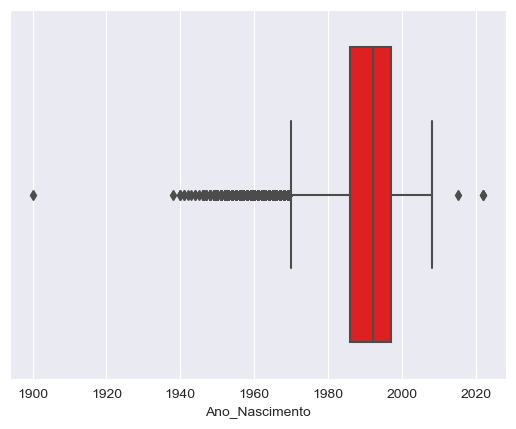

<Axes: xlabel='Ano_Nascimento'>

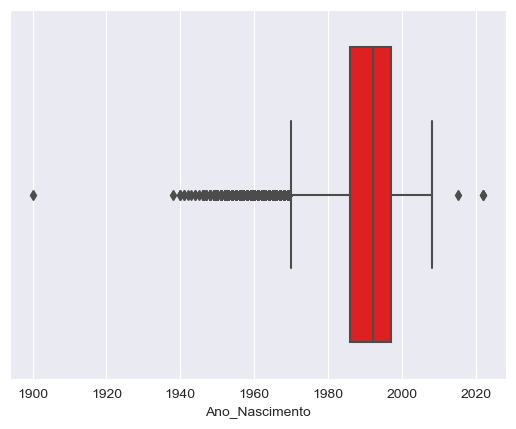

In [1670]:
sns.boxplot(x=df['Ano_Nascimento'], color='red')

#### Remoção de outliers
    - Para a remoção, foi considerado outliers, valores acima de 2005 e abaixo de 1930

Quantidade de outliers menores que 1930: 1
Quantidade de outliers maiores que 2005: 4
Outliers removidos!


<Axes: xlabel='Ano_Nascimento'>

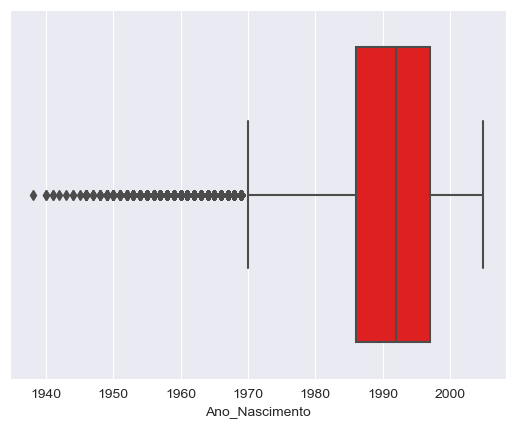

Quantidade de outliers menores que 1930: 1
Quantidade de outliers maiores que 2005: 4
Outliers removidos!


<Axes: xlabel='Ano_Nascimento'>

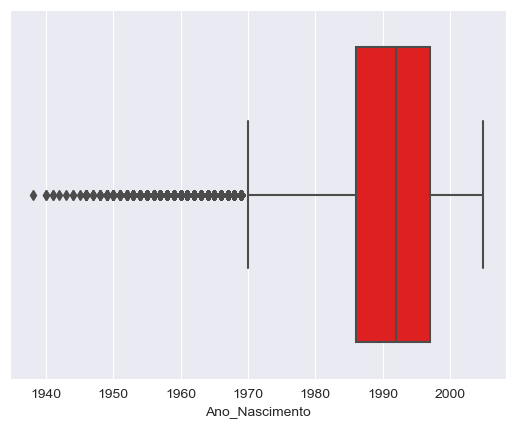

In [1671]:
print(f"Quantidade de outliers menores que 1930: {df[df['Ano_Nascimento'] < 1930]['Ano_Nascimento'].count()}")
print(f"Quantidade de outliers maiores que 2005: {df[df['Ano_Nascimento'] > 2005]['Ano_Nascimento'].count()}")

df = df.drop(df[df['Ano_Nascimento'] < 1930].index)
df = df.drop(df[df['Ano_Nascimento'] > 2005].index)
print(f"Outliers removidos!")

sns.boxplot(x=df['Ano_Nascimento'], color='red')

#### Valores nulos
    - Através da verificação de valores nulos, foi encontrado alguns valores nulos

In [1672]:
print(f"Quantidade de valores nulos: {df['Ano_Nascimento'].isnull().sum()}")

Quantidade de valores nulos: 77
Quantidade de valores nulos: 77


#### Tratamento de valores nulos
    - Para o tratamento de valores nulos, foi utilizado a média dos valores da coluna

In [1673]:
df['Ano_Nascimento'].fillna(df['Ano_Nascimento'].mean(), inplace=True)
print(f"Quantidade de valores nulos: {df['Ano_Nascimento'].isnull().sum()}")

Quantidade de valores nulos: 0
Quantidade de valores nulos: 0


#### Tipo de dado
    - Substuituídos por inteiros

In [1674]:
df['Ano_Nascimento'] = df['Ano_Nascimento'].astype(int)

#### Distribuição dos dados
    - Ideal para uma análise inicial


<Axes: xlabel='Ano_Nascimento', ylabel='Count'>

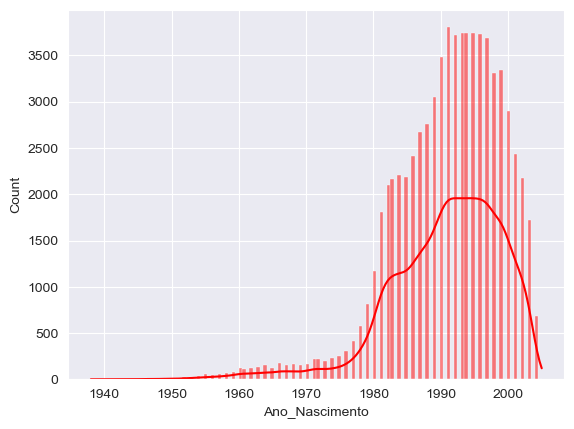

<Axes: xlabel='Ano_Nascimento', ylabel='Count'>

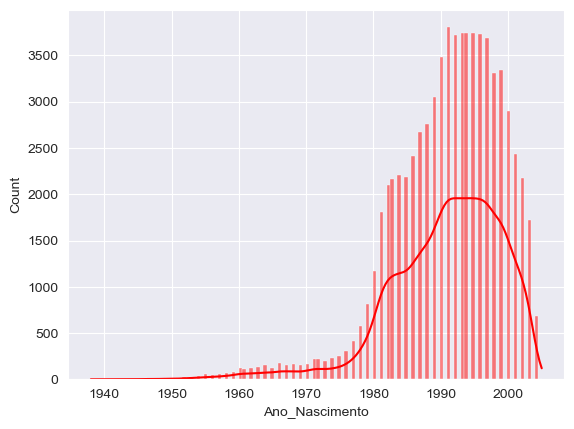

In [1675]:
sns.histplot(x=df['Ano_Nascimento'], color='red', kde=True)

In [1676]:

df['Ano_Nascimento'] = df['Ano_Nascimento'].astype(int)

### Tratamento da coluna 'Sexo'

#### Dados da coluna
    - Descrição dos dados
    - Gráfico de contagem

In [1677]:
df['Sexo'].describe()

count     73981
unique        2
top           F
freq      37030
Name: Sexo, dtype: object

count     73981
unique        2
top           F
freq      37030
Name: Sexo, dtype: object

In [1678]:
df['Sexo'].value_counts()

F    37030
M    36951
Name: Sexo, dtype: int64

F    37030
M    36951
Name: Sexo, dtype: int64

<Axes: xlabel='Sexo', ylabel='count'>

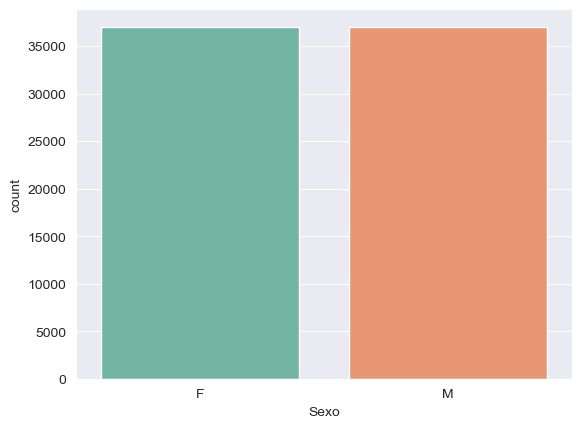

<Axes: xlabel='Sexo', ylabel='count'>

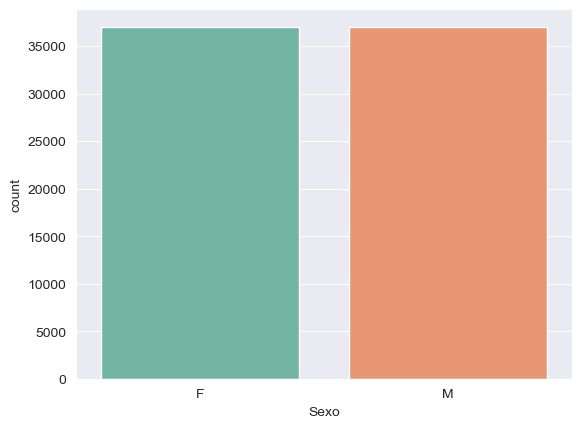

In [1679]:
sns.countplot(x=df['Sexo'], color='red', data=df, order=df['Sexo'].value_counts().index, orient='v', palette='Set2')

#### Valores nulos
    - Valores nulos foram inicialmente substituidos por 'N/A

In [1680]:
print(f"Quantidade de valores nulos: {df['Sexo'].isnull().sum()}")

Quantidade de valores nulos: 40
Quantidade de valores nulos: 40


In [1681]:
df['Sexo'].fillna('N/A', inplace=True)
print(f"Quantidade de valores nulos: {df['Sexo'].isnull().sum()}")

df['Sexo'].value_counts().reset_index().rename(columns={'index': 'Sexo', 'Sexo': 'Quantidade'})

Quantidade de valores nulos: 0


,Sexo,Quantidade
0,F,37030
1,M,36951
2,N/A,40


Quantidade de valores nulos: 0


,Sexo,Quantidade
0,F,37030
1,M,36951
2,N/A,40


### Tratamento da coluna 'Campus'

#### Desscrição da coluna
    - Importante para verificar se possui valores sem sentido ou fora do padrão
    - Gráfico de contagem

In [1682]:
df['Campus'].describe()

count     74021
unique        3
top         CAV
freq      60335
Name: Campus, dtype: object

count     74021
unique        3
top         CAV
freq      60335
Name: Campus, dtype: object

In [1683]:
df['Campus'].value_counts()

CAV    60335
CRP     8412
CAF     5274
Name: Campus, dtype: int64

CAV    60335
CRP     8412
CAF     5274
Name: Campus, dtype: int64

<Axes: xlabel='Campus', ylabel='count'>

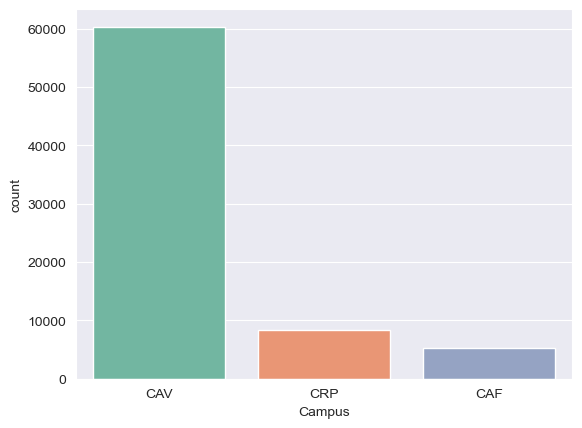

<Axes: xlabel='Campus', ylabel='count'>

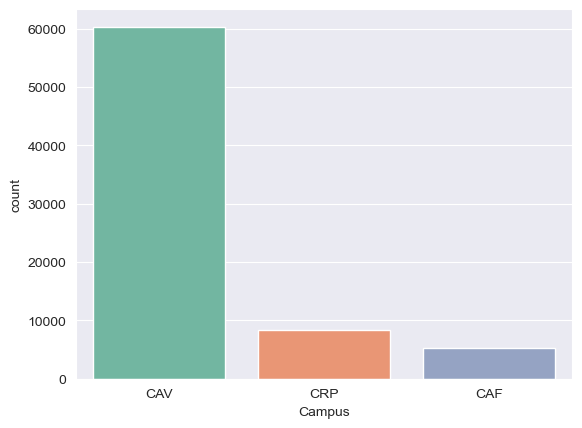

In [1684]:
sns.countplot(x=df['Campus'], color='red', data=df, order=df['Campus'].value_counts().index, orient='v', palette='Set2')

#### Traamento de valores nulos
    - A coluna 'Campus' não possui valores nulos


In [1685]:
print(f"Quantidade de valores nulos: {df['Campus'].isnull().sum()}")

Quantidade de valores nulos: 0
Quantidade de valores nulos: 0


In [1686]:
print("A coluna 'Campus' não possui valores nulos!")

A coluna 'Campus' não possui valores nulos!
A coluna 'Campus' não possui valores nulos!


### Tratamento da coluna 'Curso_Identificador'

#### Dados da coluna
    - Descrição da coluna
    - Gráfico de contagem


In [1687]:
df['Curso_Identificador'].value_counts().reset_index().rename(columns={'index': 'Curso_Identificador', 'Curso_Identificador': 'Quantidade'})

,Curso_Identificador,Quantidade
0,1103,5787
1,1121,1974
2,1113,1651
3,1132,1637
4,1114,1627
...,...,...
74,1424,243
75,1154,217
76,1418,205
77,2102,160


,Curso_Identificador,Quantidade
0,1103,5787
1,1121,1974
2,1113,1651
3,1132,1637
4,1114,1627
...,...,...
74,1424,243
75,1154,217
76,1418,205
77,2102,160


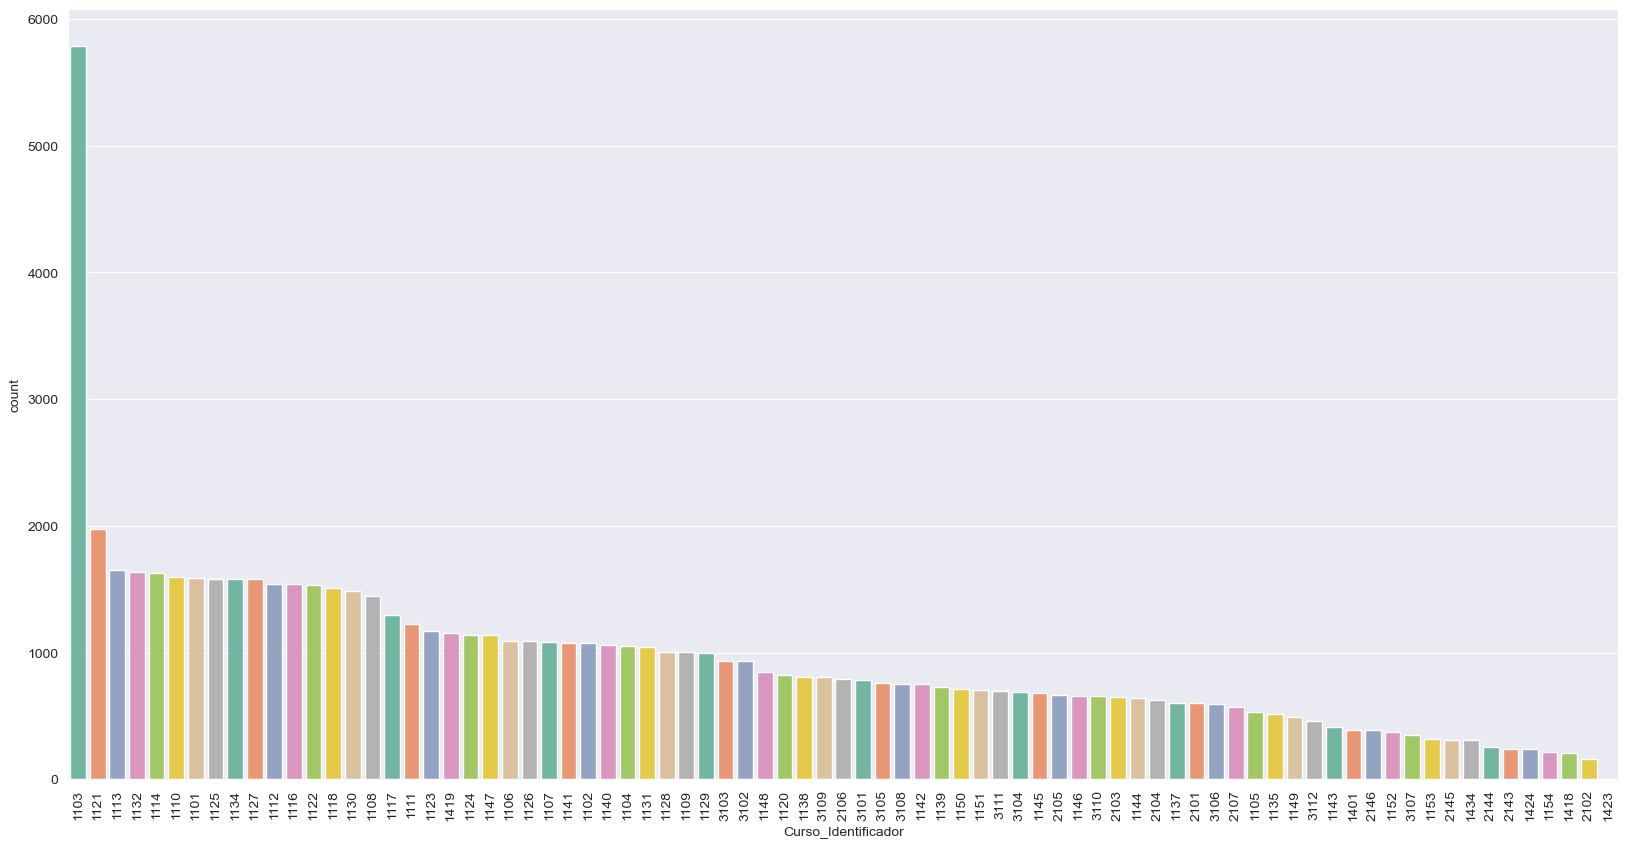

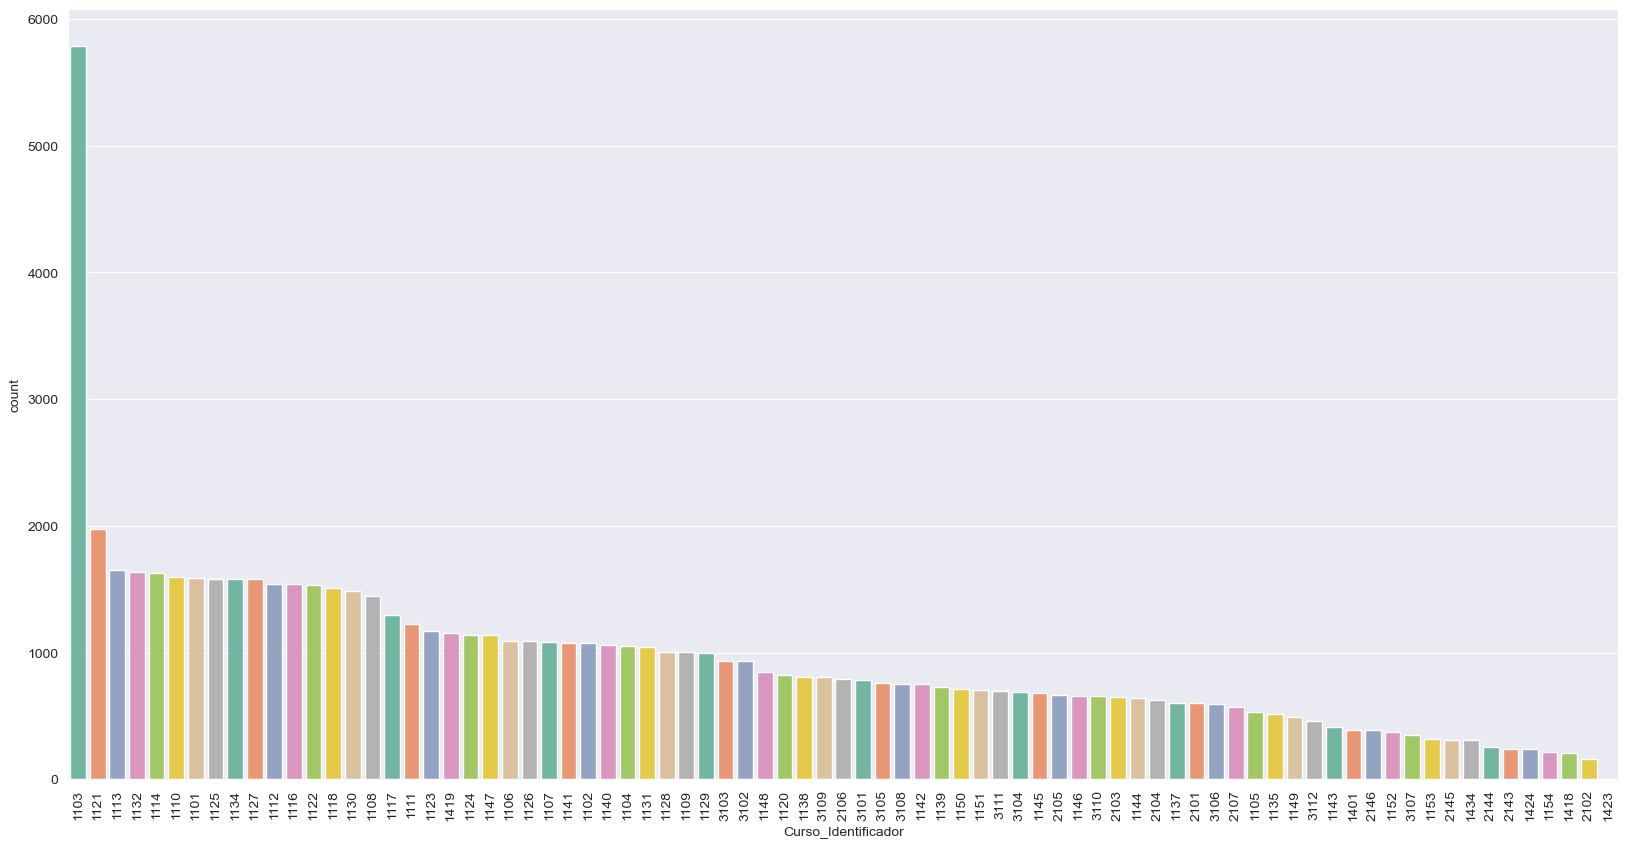

In [1688]:
ccp = sns.countplot(x=df['Curso_Identificador'], color='red', data=df, order=df['Curso_Identificador'].value_counts().index,orient='v', palette='Set2')
ccp.set_xticklabels(ccp.get_xticklabels(), rotation=90)
ccp.figure.set_size_inches(20, 10)

#### Valores nulos
    - Tratamento de valores nulos

In [1689]:
qtdCursoIdentificadorNulos = df['Curso_Identificador'].isnull().sum()
print(f"Quantidade de valores nulos: {qtdCursoIdentificadorNulos}")

Quantidade de valores nulos: 0
Quantidade de valores nulos: 0


In [1690]:
print("A coluna 'Curso_Identificador' não possui valores nulos!")

A coluna 'Curso_Identificador' não possui valores nulos!
A coluna 'Curso_Identificador' não possui valores nulos!


#### Valores irrelevantes
    - Tratamento de valores irrelevantes

In [1691]:
# Há um curso que possui apenas 1 aluno, então iremos remover esse aluno e o curso

df[df['Curso_Identificador'] == 1423]

,Identificador,Ano_Nascimento,Sexo,Campus,Curso_Identificador,Curso,UF_Nascimento,Municipio_Nascimento,Admissao,Saida,Codigo_Situacao_Aluno,Situacao_Aluno,Situacao_Aluno_Agrupada,Modalidade_Inscrita,ENEM,Num_Reprovacoes,Raca,CRA
1553,20399,1970,M,CAV,1423,CAV - LICENCIATURA EM FISICA,MG,SAO JOAO DO PARAISO,2000/2,2003/1,C,Conclusão ...,Conclusão,NaN,NaN,0,Informação não disponível,75.0


,Identificador,Ano_Nascimento,Sexo,Campus,Curso_Identificador,Curso,UF_Nascimento,Municipio_Nascimento,Admissao,Saida,Codigo_Situacao_Aluno,Situacao_Aluno,Situacao_Aluno_Agrupada,Modalidade_Inscrita,ENEM,Num_Reprovacoes,Raca,CRA
1553,20399,1970,M,CAV,1423,CAV - LICENCIATURA EM FISICA,MG,SAO JOAO DO PARAISO,2000/2,2003/1,C,Conclusão ...,Conclusão,NaN,NaN,0,Informação não disponível,75.0


In [1692]:
df = df.drop(df[df['Curso_Identificador'] == 1423].index)
print("Curso removido!")

Curso removido!
Curso removido!


### Tratamento da coluna 'Curso'

#### Dados da coluna
    - Descrição da coluna
    - Gráfico de contagem

In [1693]:
df['Curso'].describe()

count               74020
unique                 92
top       CAV - Agronomia
freq                 5787
Name: Curso, dtype: object

count               74020
unique                 92
top       CAV - Agronomia
freq                 5787
Name: Curso, dtype: object

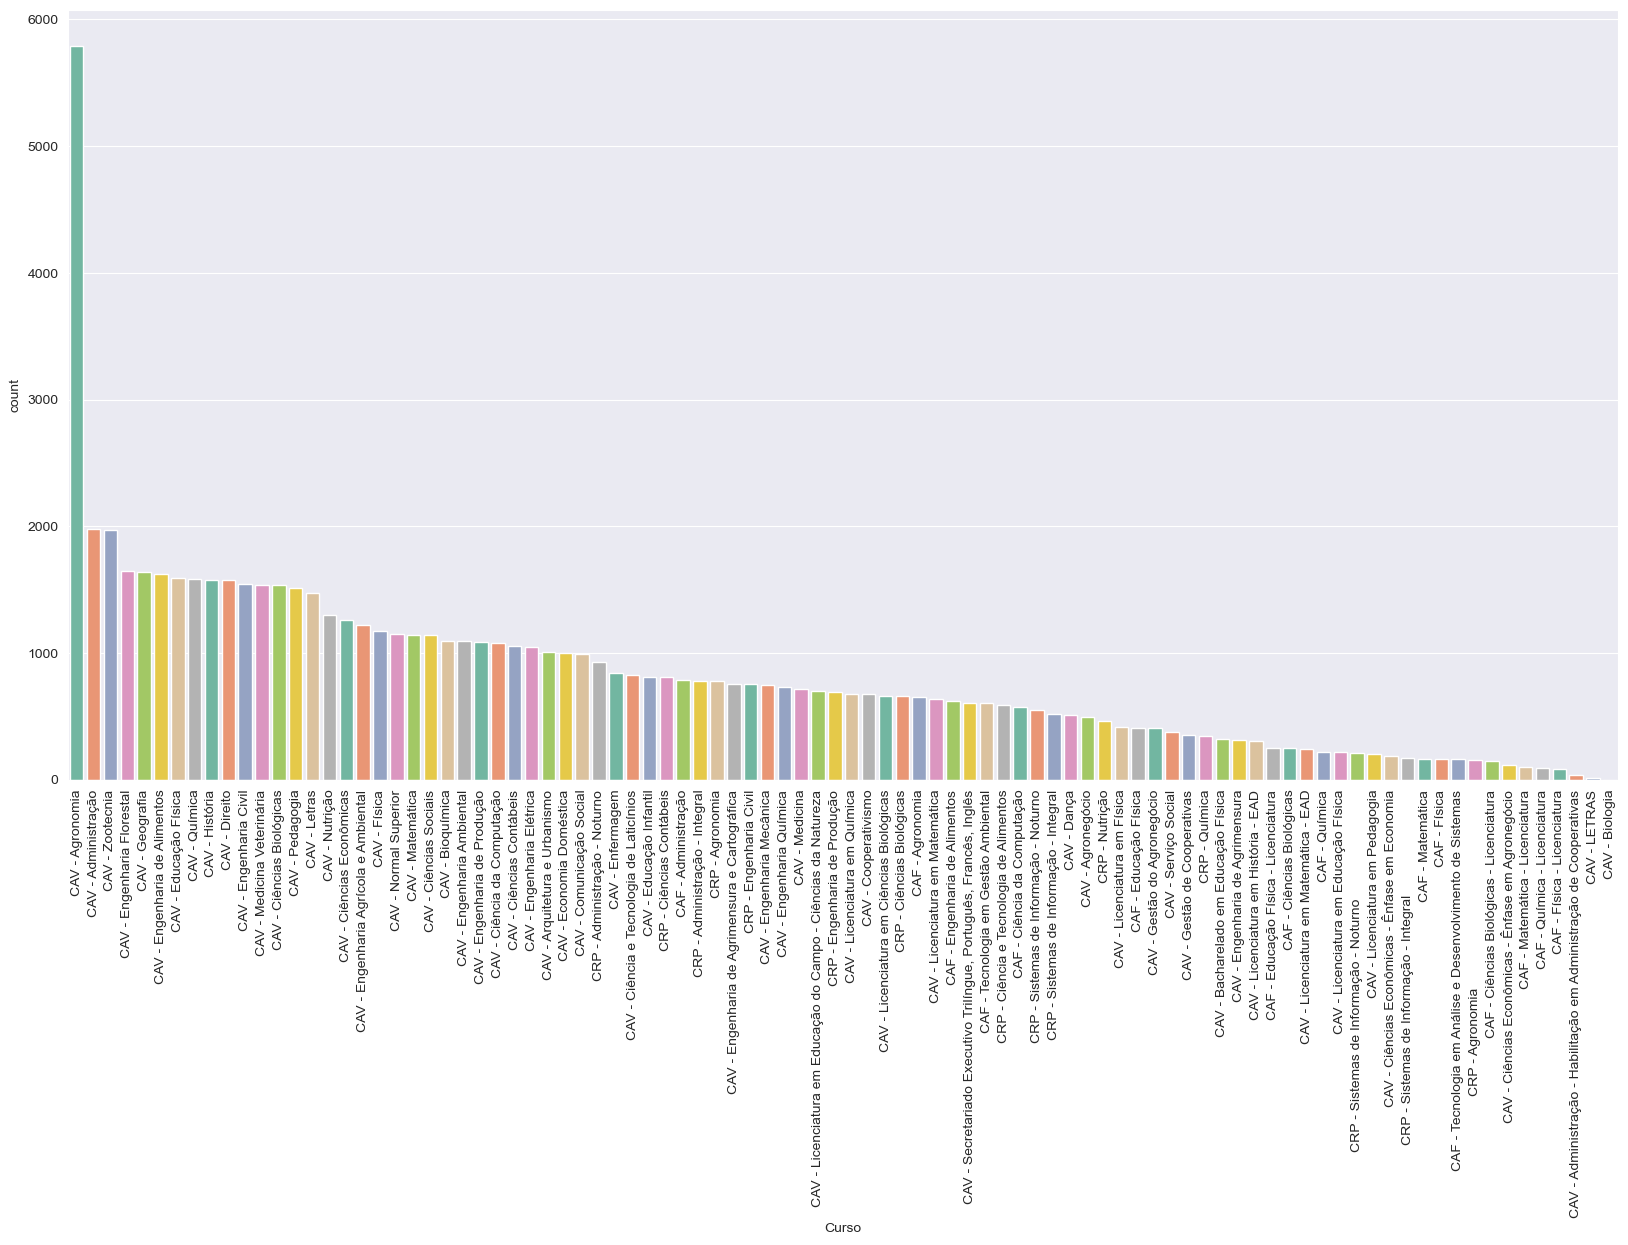

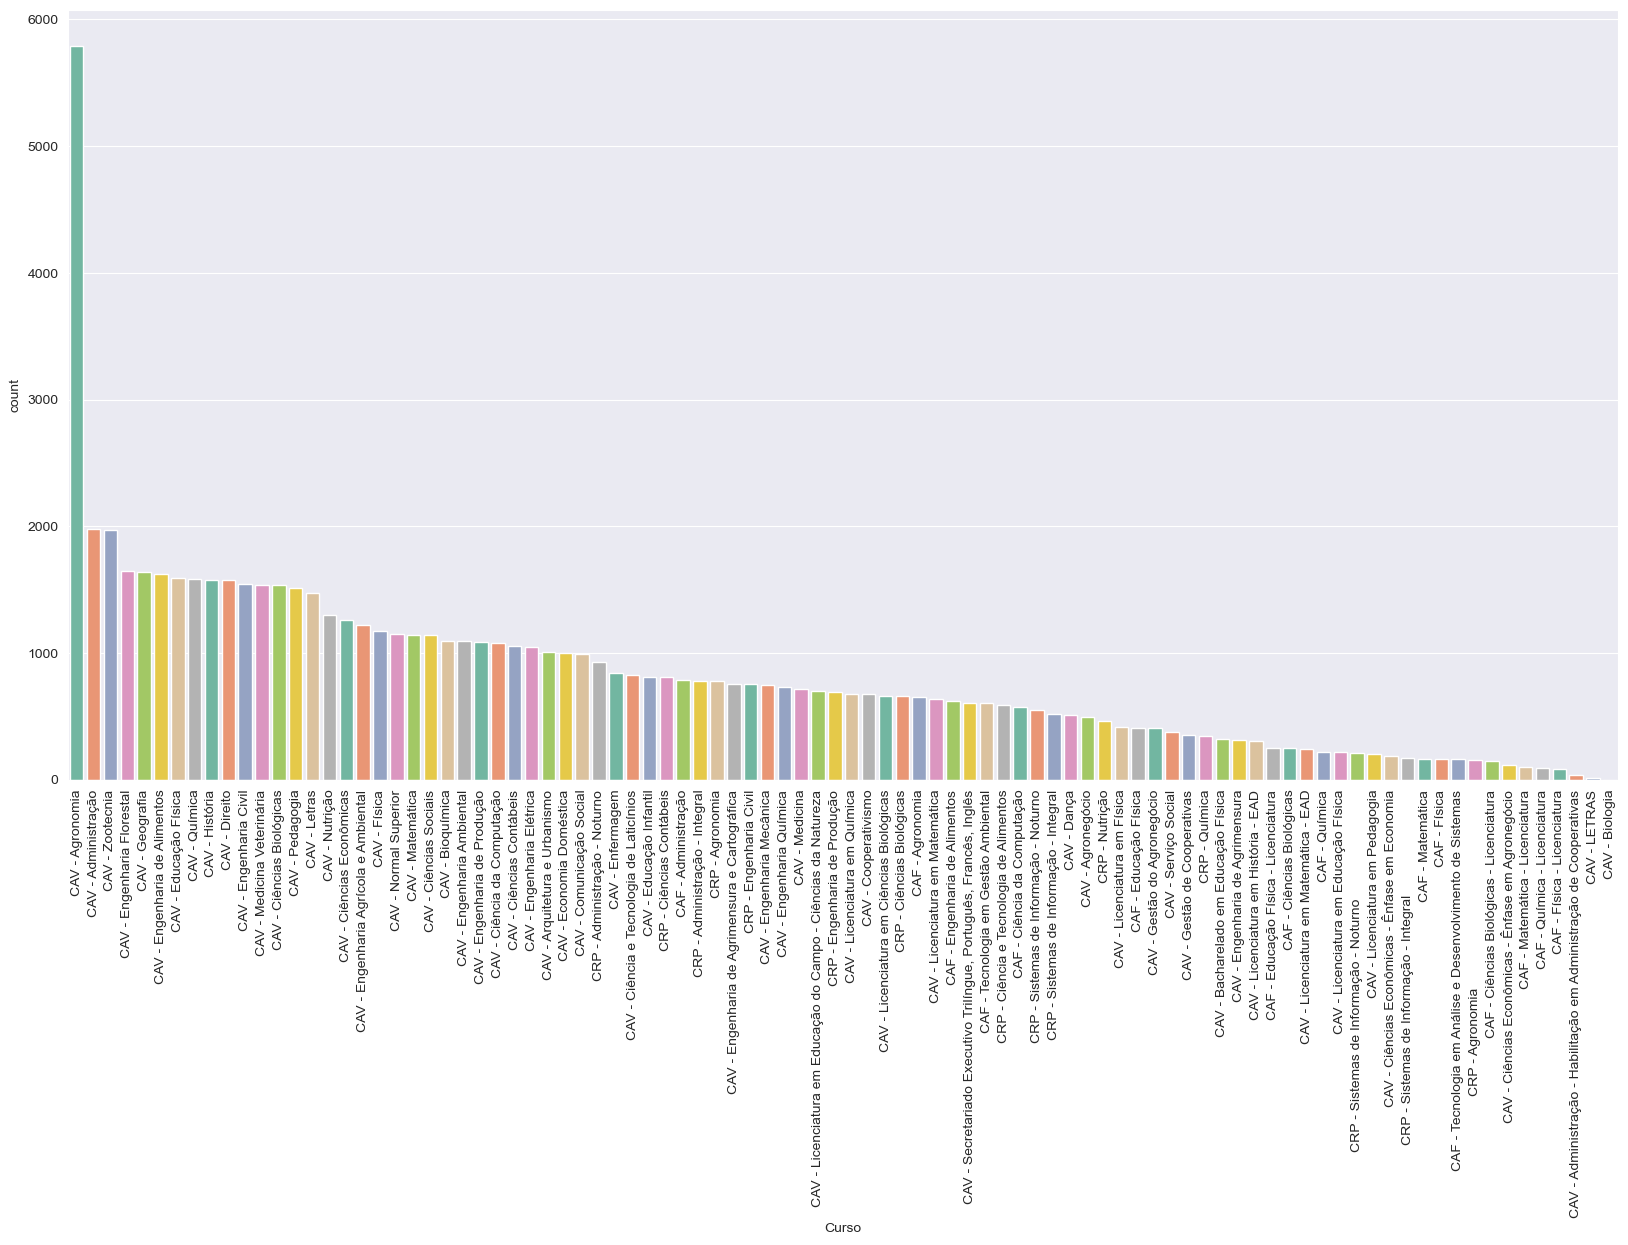

In [1694]:
ccp= sns.countplot(x=df['Curso'], color='red', data=df, order=df['Curso'].value_counts().index, orient='v', palette='Set2')
ccp.set_xticklabels(ccp.get_xticklabels(), rotation=90)
ccp.figure.set_size_inches(20, 10)

#### Nome dos cursos
    - Análise dos nomes dos cursos
    - Primeiramente foi criado um dicionário com os identificadores dos cursos e seus respectivos nomes para uma análise inicial
    - Após a análise inicial, os cursos e a quantidade de alunos por curso foram ordenados por ordem alfabética para facilitar a visualização dos dados
    - Por fim, alguns cursos foram tartados, removidos ou renomeados

In [1695]:
dict(zip(df['Curso_Identificador'], df['Curso']))

{1101: 'CAV - Administração',
 1102: 'CAV - Engenharia de Agrimensura e Cartográfica',
 1103: 'CAV - Agronomia',
 1104: 'CAV - Ciências Contábeis',
 1105: 'CAV - Ciências Econômicas - Ênfase em Agronegócio',
 1106: 'CAV - Engenharia Ambiental',
 1107: 'CAV - Engenharia de Produção',
 1108: 'CAV - Ciências Econômicas',
 1109: 'CAV - Economia Doméstica',
 1110: 'CAV - Educação Física',
 1111: 'CAV - Engenharia Agrícola e Ambiental',
 1112: 'CAV - Engenharia Civil',
 1113: 'CAV - Engenharia Florestal',
 1114: 'CAV - Engenharia de Alimentos',
 1116: 'CAV - Medicina Veterinária',
 1117: 'CAV - Nutrição',
 1118: 'CAV - Pedagogia',
 1120: 'CAV - Ciência e Tecnologia de Laticínios',
 1122: 'CAV - Ciências Biológicas',
 1123: 'CAV - Física',
 1124: 'CAV - Matemática',
 1121: 'CAV - Zootecnia',
 1125: 'CAV - Química',
 1127: 'CAV - Direito',
 1128: 'CAV - Arquitetura e Urbanismo',
 1130: 'CAV - Letras',
 1137: 'CAV - Secretariado Executivo Trilíngue, Português, Francês, Inglês',
 1140: 'CAV - Co

{1101: 'CAV - Administração',
 1102: 'CAV - Engenharia de Agrimensura e Cartográfica',
 1103: 'CAV - Agronomia',
 1104: 'CAV - Ciências Contábeis',
 1105: 'CAV - Ciências Econômicas - Ênfase em Agronegócio',
 1106: 'CAV - Engenharia Ambiental',
 1107: 'CAV - Engenharia de Produção',
 1108: 'CAV - Ciências Econômicas',
 1109: 'CAV - Economia Doméstica',
 1110: 'CAV - Educação Física',
 1111: 'CAV - Engenharia Agrícola e Ambiental',
 1112: 'CAV - Engenharia Civil',
 1113: 'CAV - Engenharia Florestal',
 1114: 'CAV - Engenharia de Alimentos',
 1116: 'CAV - Medicina Veterinária',
 1117: 'CAV - Nutrição',
 1118: 'CAV - Pedagogia',
 1120: 'CAV - Ciência e Tecnologia de Laticínios',
 1122: 'CAV - Ciências Biológicas',
 1123: 'CAV - Física',
 1124: 'CAV - Matemática',
 1121: 'CAV - Zootecnia',
 1125: 'CAV - Química',
 1127: 'CAV - Direito',
 1128: 'CAV - Arquitetura e Urbanismo',
 1130: 'CAV - Letras',
 1137: 'CAV - Secretariado Executivo Trilíngue, Português, Francês, Inglês',
 1140: 'CAV - Co

In [1696]:
df['Curso'].value_counts().sort_index().reset_index().rename(columns={'index': 'Curso', 'Curso': 'Quantidade'})

,Curso,Quantidade
0,CAF - Administração,790
1,CAF - Agronomia,651
2,CAF - Ciência da Computação,574
3,CAF - Ciências Biológicas,248
4,CAF - Ciências Biológicas - Licenciatura,145
...,...,...
87,CRP - Química,347
88,CRP - Sistemas de Informação - Integral,516
89,CRP - Sistemas de Informação - Integral ...,172
90,CRP - Sistemas de Informação - Noturno,548


,Curso,Quantidade
0,CAF - Administração,790
1,CAF - Agronomia,651
2,CAF - Ciência da Computação,574
3,CAF - Ciências Biológicas,248
4,CAF - Ciências Biológicas - Licenciatura,145
...,...,...
87,CRP - Química,347
88,CRP - Sistemas de Informação - Integral,516
89,CRP - Sistemas de Informação - Integral ...,172
90,CRP - Sistemas de Informação - Noturno,548


In [1697]:
# Há um curso com nome CAV - Biologia com apenas 1 aluno, então iremos remover esse aluno e o curso
df.drop(df[df['Curso'] == 'CAV - Biologia'].index, inplace=True)

# Há um curso com nome CAV - LETRAS com apenas 10 alunos, então iremos remover esse curso
df.drop(df[df['Curso'] == 'CAV - LETRAS'].index, inplace=True)

# Há um curso com nome CAV - Administração - Habilitação em Administração de Cooperativas com apenas 35 alunos, então iremos remover esse curso
df.drop(df[df['Curso'] == 'CAV - Administração - Habilitação em Administração de Cooperativas'].index, inplace=True)

#susbtituindo nome dos cursos que tem identificador: 3104 por 'CRP - Sistema de Informação - Integral'
df.loc[df['Curso_Identificador'] == 3104, 'Curso'] = 'CRP - Sistema de Informação - Integral'

#susbtituindo nome dos cursos que tem identificador: 3105 por 'CRP - Sistema de Informação - Noturno'
df.loc[df['Curso_Identificador'] == 3105, 'Curso'] = 'CRP - Sistema de Informação - Noturno'

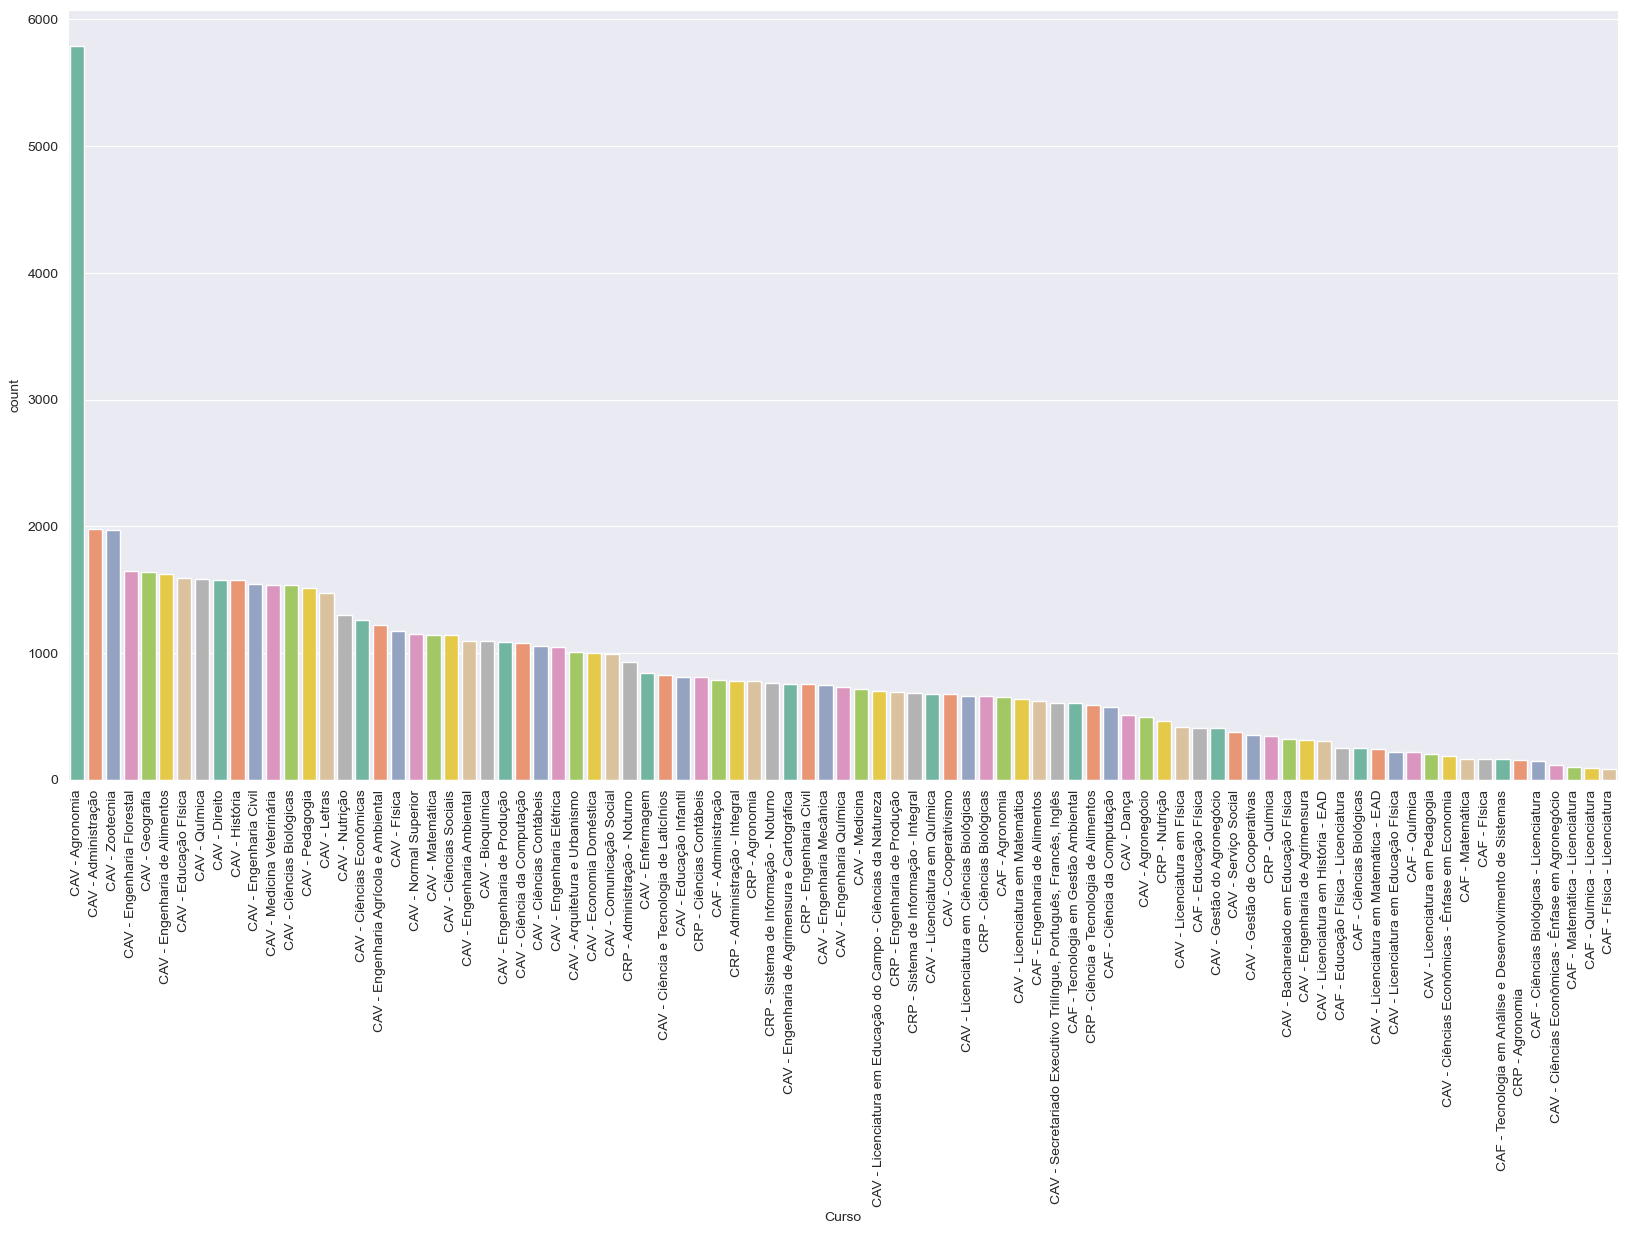

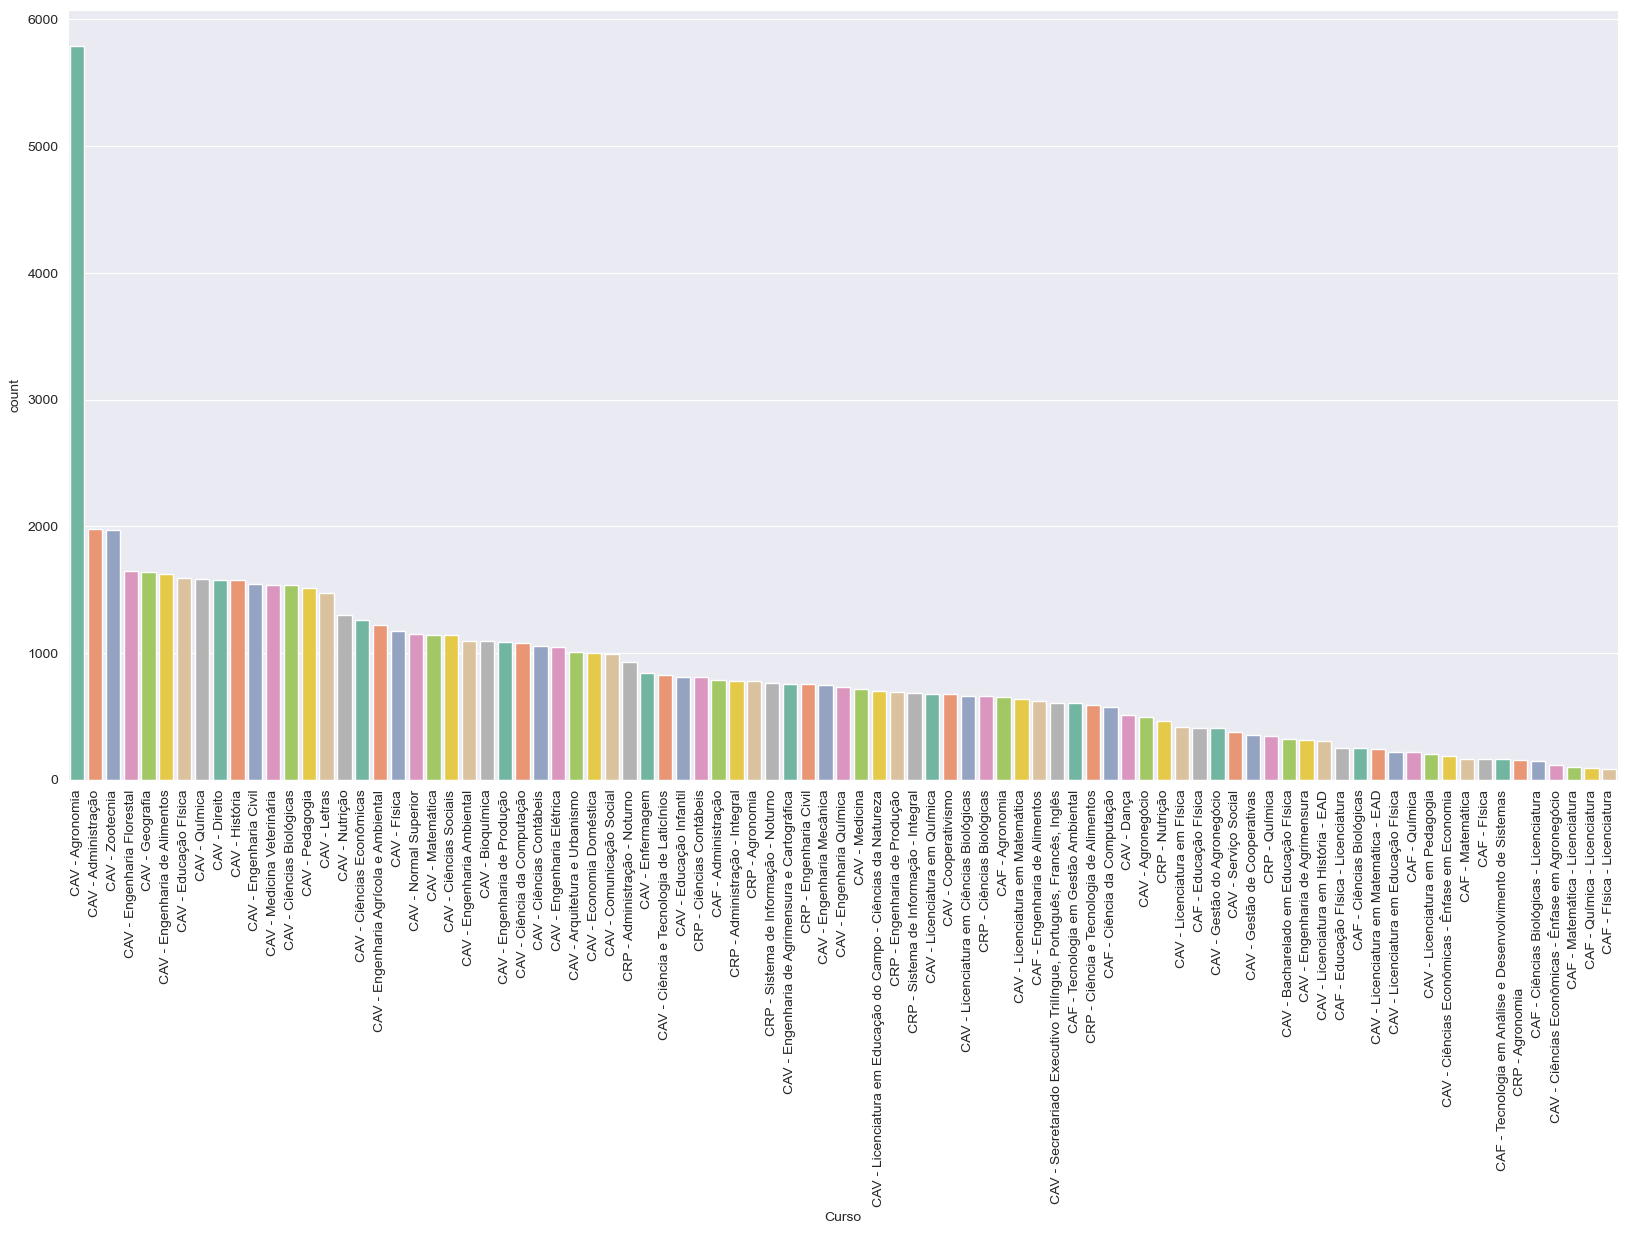

In [1698]:
ccp = sns.countplot(x=df['Curso'], color='red', data=df, order=df['Curso'].value_counts().index, orient='v', palette='Set2')
ccp.set_xticklabels(ccp.get_xticklabels(), rotation=90)
ccp.figure.set_size_inches(20, 10)

#### Valores nulos
    - Tratamento de valores nulos

In [1699]:
print(f"Quantidade de valores nulos: {df['Curso'].isnull().sum()}")

Quantidade de valores nulos: 0
Quantidade de valores nulos: 0


In [1700]:
print("A coluna 'Curso' não possui valores nulos!")

A coluna 'Curso' não possui valores nulos!
A coluna 'Curso' não possui valores nulos!


### Tratamento da coluna 'UF_Nascimento'

#### Dados da coluna
    - Descrição da coluna
    - Gráfico de contagem

In [1701]:
df['UF_Nascimento'].value_counts().reset_index().rename(columns={'index': 'UF_Nascimento', 'UF_Nascimento': 'Quantidade'})

,UF_Nascimento,Quantidade
0,MG,57293
1,SP,6412
2,RJ,3361
3,ES,3183
4,BA,1087
5,GO,508
6,DF,394
7,PR,294
8,PA,213
9,MT,177


,UF_Nascimento,Quantidade
0,MG,57293
1,SP,6412
2,RJ,3361
3,ES,3183
4,BA,1087
5,GO,508
6,DF,394
7,PR,294
8,PA,213
9,MT,177


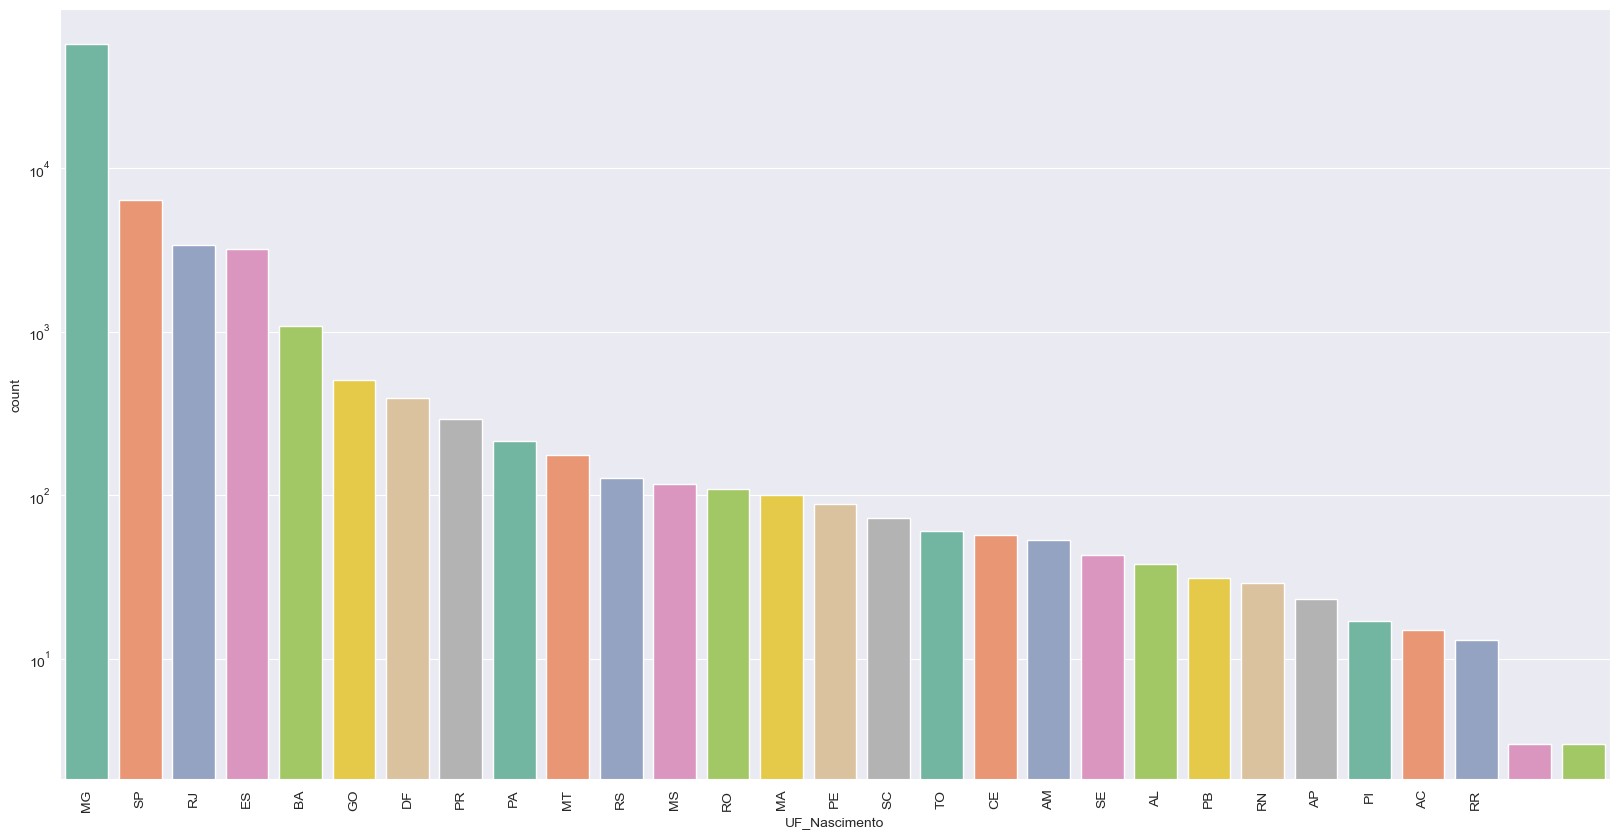

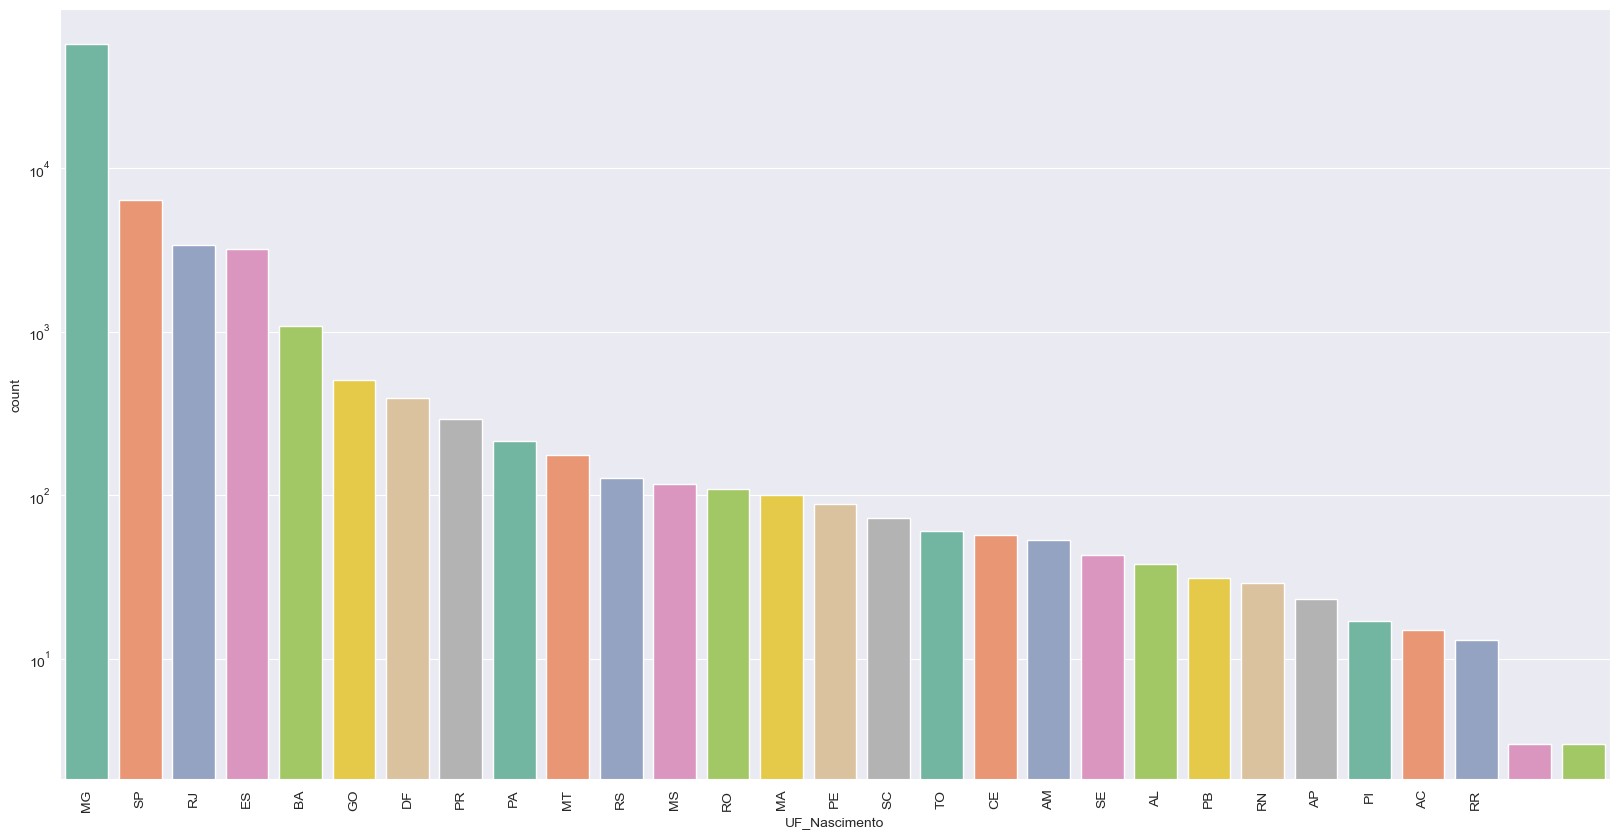

In [1702]:
ucp = sns.countplot(x=df['UF_Nascimento'], color='red', data=df, order=df['UF_Nascimento'].value_counts().index, orient='v', palette='Set2')
ucp.set_xticklabels(ucp.get_xticklabels(), rotation=90)
ucp.figure.set_size_inches(20, 10)
ucp.set_yscale('log')

#### Valores nulos
    - Tratamento de valores nulos

In [1703]:
df[df['UF_Nascimento'].isnull()]

,Identificador,Ano_Nascimento,Sexo,Campus,Curso_Identificador,Curso,UF_Nascimento,Municipio_Nascimento,Admissao,Saida,Codigo_Situacao_Aluno,Situacao_Aluno,Situacao_Aluno_Agrupada,Modalidade_Inscrita,ENEM,Num_Reprovacoes,Raca,CRA
43391,114475,1987,M,CAV,1121,CAV - Zootecnia,NaN,Barbados,2015/1,2016/1,M,Mudança de Curso ...,Evasão,0.0,NaN,6,Preto(a),55.9
43450,114476,1993,F,CAV,1116,CAV - Medicina Veterinária,NaN,La Ceiba - Atlántida,2015/1,2021/1,C,Conclusão ...,Conclusão,0.0,NaN,9,Indígena,65.6
44186,114478,1994,M,CAV,1126,CAV - Bioquímica,NaN,Benguela - Lobito,2015/1,2016/1,M,Mudança de Curso ...,Evasão,0.0,NaN,10,Preto(a),40.4
50037,30006018,1990,M,CRP,3101,CRP - Administração - Integral,NaN,NaN,2016/1,2016/1,A,Estudante em abandono de curso ...,Evasão,NaN,NaN,0,Informação não disponível,NaN
50736,134043,1994,M,CAV,1117,CAV - Nutrição,NaN,Benguela - Lobito,2016/2,2021/1,A,Abandono ...,Evasão,0.0,NaN,11,Preto(a),56.9
50740,134044,1987,M,CAV,1116,CAV - Medicina Veterinária,NaN,Barbados,2016/2,2019/1,D,Desligamento ...,Evasão,0.0,NaN,18,Preto(a),32.8
52448,138978,1995,F,CAV,1116,CAV - Medicina Veterinária,NaN,Managua,2017/1,0,N,Normal ...,Retenção,0.0,NaN,11,Amarelo(a),68.1
52759,138980,1994,F,CAV,1129,CAV - Comunicação Social,NaN,Bohicon,2017/1,2021/1,C,Conclusão ...,Conclusão,0.0,NaN,1,Preto(a),78.1
56591,145912,1999,F,CAV,1126,CAV - Bioquímica,NaN,Pedro Juan Caballero,2018/1,2018/1,A,Abandono ...,Evasão,0.0,NaN,6,Amarelo(a),6.2
56870,147738,1990,F,CAV,1153,CAV - Bacharelado em Educação Física,NaN,NaN,2018/1,2018/1,A,Abandono ...,Evasão,0.0,NaN,0,Informação não disponível,0.0


,Identificador,Ano_Nascimento,Sexo,Campus,Curso_Identificador,Curso,UF_Nascimento,Municipio_Nascimento,Admissao,Saida,Codigo_Situacao_Aluno,Situacao_Aluno,Situacao_Aluno_Agrupada,Modalidade_Inscrita,ENEM,Num_Reprovacoes,Raca,CRA
43391,114475,1987,M,CAV,1121,CAV - Zootecnia,NaN,Barbados,2015/1,2016/1,M,Mudança de Curso ...,Evasão,0.0,NaN,6,Preto(a),55.9
43450,114476,1993,F,CAV,1116,CAV - Medicina Veterinária,NaN,La Ceiba - Atlántida,2015/1,2021/1,C,Conclusão ...,Conclusão,0.0,NaN,9,Indígena,65.6
44186,114478,1994,M,CAV,1126,CAV - Bioquímica,NaN,Benguela - Lobito,2015/1,2016/1,M,Mudança de Curso ...,Evasão,0.0,NaN,10,Preto(a),40.4
50037,30006018,1990,M,CRP,3101,CRP - Administração - Integral,NaN,NaN,2016/1,2016/1,A,Estudante em abandono de curso ...,Evasão,NaN,NaN,0,Informação não disponível,NaN
50736,134043,1994,M,CAV,1117,CAV - Nutrição,NaN,Benguela - Lobito,2016/2,2021/1,A,Abandono ...,Evasão,0.0,NaN,11,Preto(a),56.9
50740,134044,1987,M,CAV,1116,CAV - Medicina Veterinária,NaN,Barbados,2016/2,2019/1,D,Desligamento ...,Evasão,0.0,NaN,18,Preto(a),32.8
52448,138978,1995,F,CAV,1116,CAV - Medicina Veterinária,NaN,Managua,2017/1,0,N,Normal ...,Retenção,0.0,NaN,11,Amarelo(a),68.1
52759,138980,1994,F,CAV,1129,CAV - Comunicação Social,NaN,Bohicon,2017/1,2021/1,C,Conclusão ...,Conclusão,0.0,NaN,1,Preto(a),78.1
56591,145912,1999,F,CAV,1126,CAV - Bioquímica,NaN,Pedro Juan Caballero,2018/1,2018/1,A,Abandono ...,Evasão,0.0,NaN,6,Amarelo(a),6.2
56870,147738,1990,F,CAV,1153,CAV - Bacharelado em Educação Física,NaN,NaN,2018/1,2018/1,A,Abandono ...,Evasão,0.0,NaN,0,Informação não disponível,0.0


##### Foi verificado que os alunos que não possuem UF de nascimento são alunos estrangeiros ou que não informaram o município de nascimento
##### Serão excluídos

In [1704]:
df.drop(df[df['UF_Nascimento'].isnull()].index, inplace=True)

#### Valores irrelevantes
    - Tratamento de valores irrelevantes


In [1705]:
df['UF_Nascimento'].value_counts().reset_index().rename(columns={'index': 'UF_Nascimento', 'UF_Nascimento': 'Quantidade'}).query('Quantidade < 12')

,UF_Nascimento,Quantidade
27,,3
28,,3


,UF_Nascimento,Quantidade
27,,3
28,,3


In [1706]:
df[df['UF_Nascimento'].map(df['UF_Nascimento'].value_counts()) == 3]

,Identificador,Ano_Nascimento,Sexo,Campus,Curso_Identificador,Curso,UF_Nascimento,Municipio_Nascimento,Admissao,Saida,Codigo_Situacao_Aluno,Situacao_Aluno,Situacao_Aluno_Agrupada,Modalidade_Inscrita,ENEM,Num_Reprovacoes,Raca,CRA
604,35371,1978,M,CAV,1113,CAV - Engenharia Florestal,,ATHENS,2000/1,2004/2,A,Abandono ...,Evasão,0.0,NaN,3,Informação não disponível,77.3
1060,29527,1980,M,CAV,1116,CAV - Medicina Veterinária,,LEON,2000/1,2002/1,T,Transferência ...,Evasão,NaN,NaN,0,Informação não disponível,74.3
1267,29358,1990,M,CAV,1122,CAV - Ciências Biológicas,,São Paulo,2000/1,2000/1,A,Abandono ...,Evasão,0.0,NaN,6,Informação não disponível,0.0
26274,30000973,1987,F,CRP,3110,CRP - Ciências Biológicas,,"PLYMOUTH, MASSACHUSETS",2010/1,2012/2,A,Estudante em abandono de curso ...,Evasão,NaN,NaN,8,Branco(a),33.4
70014,30009688,2001,M,CRP,3107,CRP - Química,,Nagóia,2021/1,2021/2,A,Estudante em abandono de curso ...,Evasão,9.0,609.34,1,Informação não disponível,58.5
70054,30009864,2002,F,CRP,3111,CRP - Engenharia de Produção,,Viçosa,2021/1,2021/2,A,Estudante em abandono de curso ...,Evasão,3.0,644.30,0,Informação não disponível,0.0


,Identificador,Ano_Nascimento,Sexo,Campus,Curso_Identificador,Curso,UF_Nascimento,Municipio_Nascimento,Admissao,Saida,Codigo_Situacao_Aluno,Situacao_Aluno,Situacao_Aluno_Agrupada,Modalidade_Inscrita,ENEM,Num_Reprovacoes,Raca,CRA
604,35371,1978,M,CAV,1113,CAV - Engenharia Florestal,,ATHENS,2000/1,2004/2,A,Abandono ...,Evasão,0.0,NaN,3,Informação não disponível,77.3
1060,29527,1980,M,CAV,1116,CAV - Medicina Veterinária,,LEON,2000/1,2002/1,T,Transferência ...,Evasão,NaN,NaN,0,Informação não disponível,74.3
1267,29358,1990,M,CAV,1122,CAV - Ciências Biológicas,,São Paulo,2000/1,2000/1,A,Abandono ...,Evasão,0.0,NaN,6,Informação não disponível,0.0
26274,30000973,1987,F,CRP,3110,CRP - Ciências Biológicas,,"PLYMOUTH, MASSACHUSETS",2010/1,2012/2,A,Estudante em abandono de curso ...,Evasão,NaN,NaN,8,Branco(a),33.4
70014,30009688,2001,M,CRP,3107,CRP - Química,,Nagóia,2021/1,2021/2,A,Estudante em abandono de curso ...,Evasão,9.0,609.34,1,Informação não disponível,58.5
70054,30009864,2002,F,CRP,3111,CRP - Engenharia de Produção,,Viçosa,2021/1,2021/2,A,Estudante em abandono de curso ...,Evasão,3.0,644.30,0,Informação não disponível,0.0


##### Foi verificado que alguns alunos possuem UF de nascimento vazio, estas colunas serão excluídas

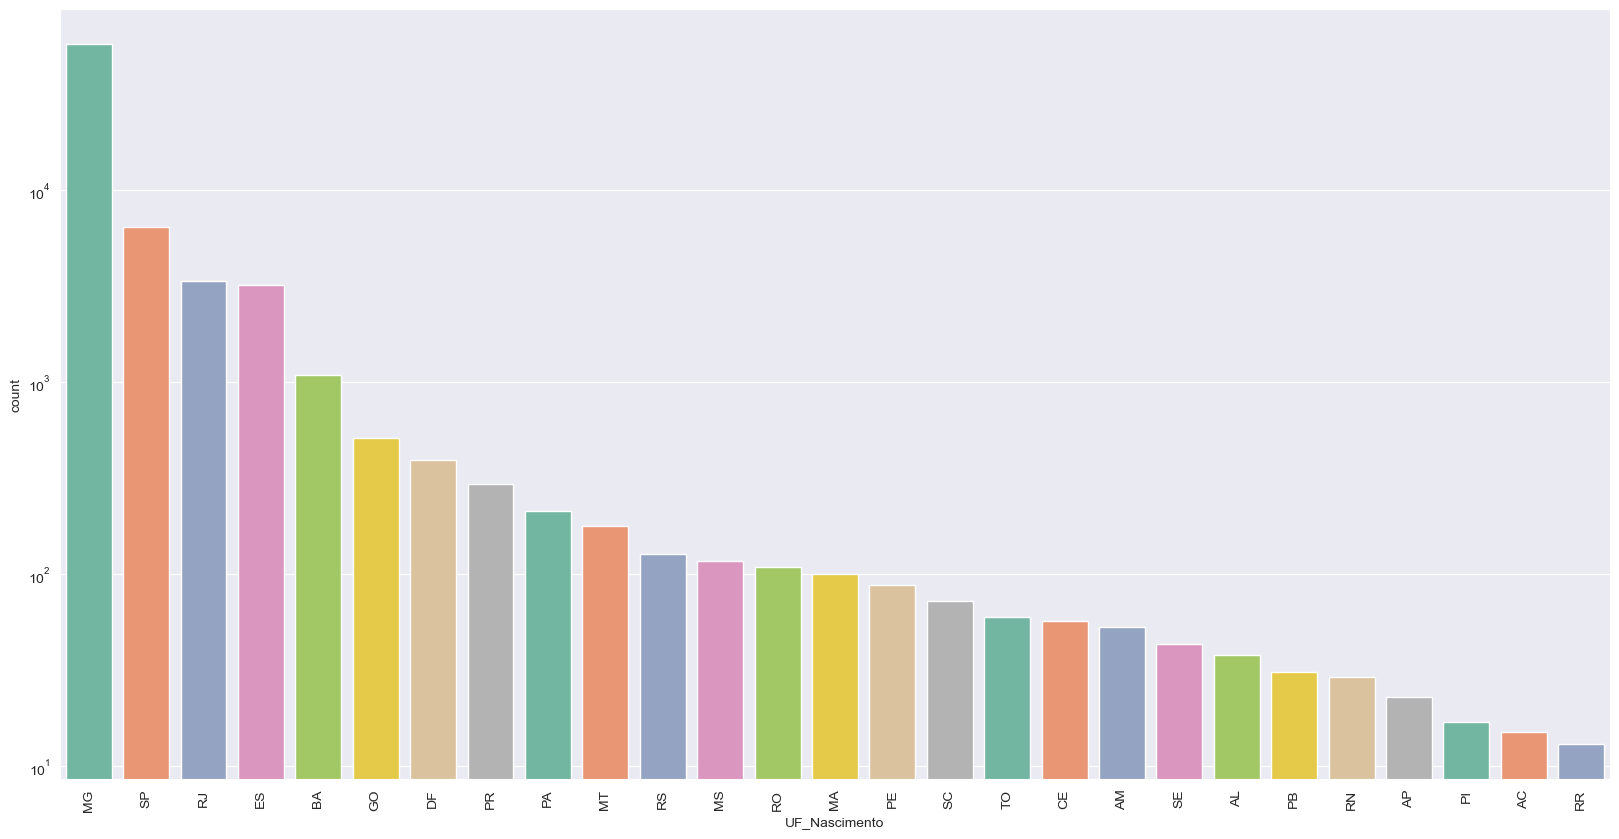

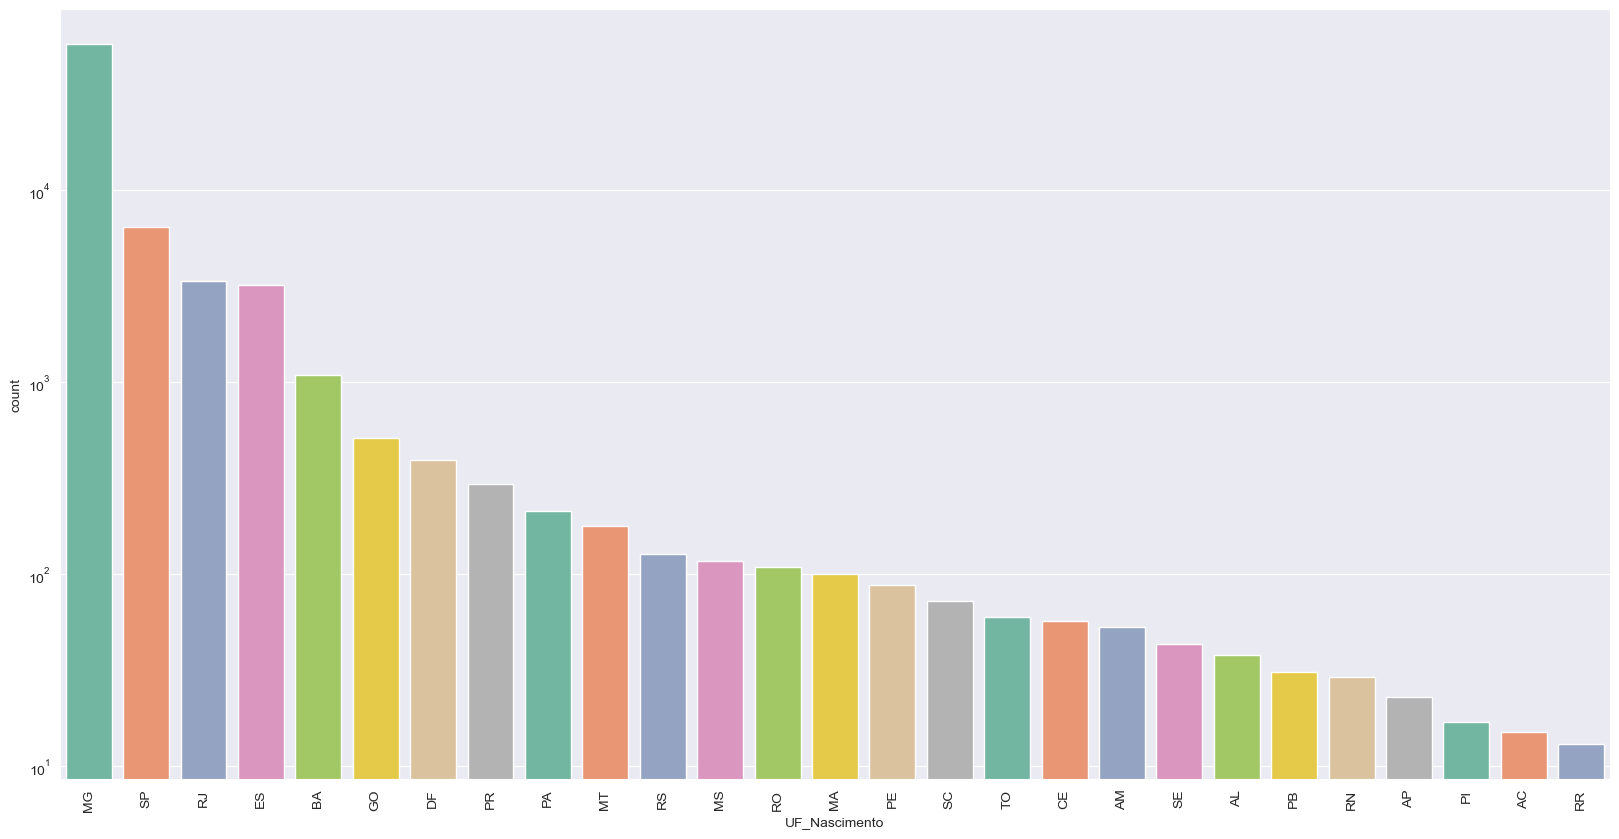

In [1707]:
df = df[~df['UF_Nascimento'].isin(df['UF_Nascimento'].value_counts()[df['UF_Nascimento'].value_counts() == 3].index)]

ucp = sns.countplot(x=df['UF_Nascimento'], color='red', data=df, order=df['UF_Nascimento'].value_counts().index, orient='v', palette='Set2')
ucp.set_xticklabels(ucp.get_xticklabels(), rotation=90)
ucp.figure.set_size_inches(20, 10)
ucp.set_yscale('log')

### Tratamento da coluna 'Municipio_Nascimento'

#### Dados da coluna
    - Descrição da coluna

In [1708]:
df['Municipio_Nascimento'].value_counts().reset_index().rename(columns={'index': 'Municipio_Nascimento', 'Municipio_Nascimento': 'Quantidade'})

,Municipio_Nascimento,Quantidade
0,Viçosa,10652
1,Belo Horizonte,5548
2,Ponte Nova,2418
3,São Paulo,2074
4,Ubá,1914
...,...,...
3023,Itabirinha de Mantena,1
3024,Divinopólis,1
3025,Visconde do Rio Branco,1
3026,Iporã,1


,Municipio_Nascimento,Quantidade
0,Viçosa,10652
1,Belo Horizonte,5548
2,Ponte Nova,2418
3,São Paulo,2074
4,Ubá,1914
...,...,...
3023,Itabirinha de Mantena,1
3024,Divinopólis,1
3025,Visconde do Rio Branco,1
3026,Iporã,1


#### Valores nulos
    - Tratamento de valores nulos

In [1709]:
print(f"Quantidade de valores nulos: {df['Municipio_Nascimento'].isnull().sum()}")

Quantidade de valores nulos: 17
Quantidade de valores nulos: 17


In [1710]:
df['Municipio_Nascimento'].fillna('N/A', inplace=True)
print(f"Quantidade de valores nulos: {df['Municipio_Nascimento'].isnull().sum()}")

Quantidade de valores nulos: 0
Quantidade de valores nulos: 0


#### Tipo de dado
    - Transformando o tipo de dado para string

In [1711]:
df['Municipio_Nascimento'] = df['Municipio_Nascimento'].astype(str)

#### Nome dos municipios
    - Tratamento de nomes de municipios

***Removendo os espaços em branco no início e no fim de cada nome de municipio***

In [1712]:
df['Municipio_Nascimento'] = df['Municipio_Nascimento'].str.strip()

***Removendo os espaços em branco duplicados no meio de cada nome de municipio***

In [1713]:
df['Municipio_Nascimento'] = df['Municipio_Nascimento'].str.replace(' +', ' ', regex=True)

***Municipios que estão em uppercase serão colocados em lower-case, com exceção da suas iniciais***

In [1714]:
if df['Municipio_Nascimento'].str.isupper().any():
    df['Municipio_Nascimento'] = df['Municipio_Nascimento'].str.lower()
    df['Municipio_Nascimento'] = df['Municipio_Nascimento'].str.title()

***Colocando todas as cidades em uma lista***

In [1715]:
munUFV = df['Municipio_Nascimento'].unique().tolist()
len(munUFV)

2312

2312

***Lista de municípios do IBGE - Tratamento***

In [1716]:
url = 'https://servicodados.ibge.gov.br/api/v1/localidades/municipios'
r = requests.get(url)
munExistente = json.loads(r.text)
munExistente = [municipio['nome'] for municipio in munExistente]
munExistente

["Alta Floresta D'Oeste",
 'Ariquemes',
 'Cabixi',
 'Cacoal',
 'Cerejeiras',
 'Colorado do Oeste',
 'Corumbiara',
 'Costa Marques',
 "Espigão D'Oeste",
 'Guajará-Mirim',
 'Jaru',
 'Ji-Paraná',
 "Machadinho D'Oeste",
 "Nova Brasilândia D'Oeste",
 'Ouro Preto do Oeste',
 'Pimenta Bueno',
 'Porto Velho',
 'Presidente Médici',
 'Rio Crespo',
 'Rolim de Moura',
 "Santa Luzia D'Oeste",
 'Vilhena',
 'São Miguel do Guaporé',
 'Nova Mamoré',
 "Alvorada D'Oeste",
 'Alto Alegre dos Parecis',
 'Alto Paraíso',
 'Buritis',
 'Novo Horizonte do Oeste',
 'Cacaulândia',
 'Campo Novo de Rondônia',
 'Candeias do Jamari',
 'Castanheiras',
 'Chupinguaia',
 'Cujubim',
 'Governador Jorge Teixeira',
 'Itapuã do Oeste',
 'Ministro Andreazza',
 'Mirante da Serra',
 'Monte Negro',
 'Nova União',
 'Parecis',
 'Pimenteiras do Oeste',
 'Primavera de Rondônia',
 "São Felipe D'Oeste",
 'São Francisco do Guaporé',
 'Seringueiras',
 'Teixeirópolis',
 'Theobroma',
 'Urupá',
 'Vale do Anari',
 'Vale do Paraíso',
 'Acrelân

["Alta Floresta D'Oeste",
 'Ariquemes',
 'Cabixi',
 'Cacoal',
 'Cerejeiras',
 'Colorado do Oeste',
 'Corumbiara',
 'Costa Marques',
 "Espigão D'Oeste",
 'Guajará-Mirim',
 'Jaru',
 'Ji-Paraná',
 "Machadinho D'Oeste",
 "Nova Brasilândia D'Oeste",
 'Ouro Preto do Oeste',
 'Pimenta Bueno',
 'Porto Velho',
 'Presidente Médici',
 'Rio Crespo',
 'Rolim de Moura',
 "Santa Luzia D'Oeste",
 'Vilhena',
 'São Miguel do Guaporé',
 'Nova Mamoré',
 "Alvorada D'Oeste",
 'Alto Alegre dos Parecis',
 'Alto Paraíso',
 'Buritis',
 'Novo Horizonte do Oeste',
 'Cacaulândia',
 'Campo Novo de Rondônia',
 'Candeias do Jamari',
 'Castanheiras',
 'Chupinguaia',
 'Cujubim',
 'Governador Jorge Teixeira',
 'Itapuã do Oeste',
 'Ministro Andreazza',
 'Mirante da Serra',
 'Monte Negro',
 'Nova União',
 'Parecis',
 'Pimenteiras do Oeste',
 'Primavera de Rondônia',
 "São Felipe D'Oeste",
 'São Francisco do Guaporé',
 'Seringueiras',
 'Teixeirópolis',
 'Theobroma',
 'Urupá',
 'Vale do Anari',
 'Vale do Paraíso',
 'Acrelân

***Verificando se os municípios existem na realidade***

In [1717]:
munNaoExistente = []
for municipio in munUFV:
    if municipio not in munExistente:
        munNaoExistente.append(municipio)
print(f'Quantidade de municípios que não estão na lista do IBGE: {len(munNaoExistente)}')

Quantidade de municípios que não estão na lista do IBGE: 998
Quantidade de municípios que não estão na lista do IBGE: 998


***Tratamento dos possíveis municipios que não existem. Similaridades acima de 90 entre os municipios que não existem e os municipios do IBGE***
***usando a biblioteca fuzzywuzzy, serão substituídos***

In [1718]:
munSim = []

for municipio in munNaoExistente:
    for municipioIBGE in munExistente:
        if fuzz.ratio(municipio, municipioIBGE) > 90:
            munSim.append((municipio, municipioIBGE))
print(f'Quantidade de municípios que não estão na lista do IBGE: {len(munSim)}')

Quantidade de municípios que não estão na lista do IBGE: 478
Quantidade de municípios que não estão na lista do IBGE: 478


***Usando similaridades para substituir os municipios que não existem para os municipios do IBGE***

In [1719]:
for municipio in munSim:
    df['Municipio_Nascimento'] = df['Municipio_Nascimento'].str.replace(municipio[0], municipio[1])

In [1720]:
for municipio in munSim:
    if municipio[0] in munNaoExistente:
        munNaoExistente.remove(municipio[0])
print(f'Quantidade de municípios que não estão na lista do IBGE: {len(munNaoExistente)}')

Quantidade de municípios que não estão na lista do IBGE: 543
Quantidade de municípios que não estão na lista do IBGE: 543


***O restante dos municipios que não existem serão excluídos, pois não possuem similaridades com os municipios do IBGE ou são de outros países***

In [1721]:
for municipio in munNaoExistente:
    df.drop(df[df['Municipio_Nascimento'] == municipio].index, inplace=True)

In [1722]:
df['Municipio_Nascimento'].value_counts()

Viçosa                 10723
Belo Horizonte          5789
Ponte Nova              2485
São Paulo               2098
Ubá                     1922
                       ...  
Rubelita                   1
Salesópolis                1
Mário Campos               1
Bom Jesus do Amparo        1
Tomé-Açu                   1
Name: Municipio_Nascimento, Length: 1656, dtype: int64

Viçosa                 10723
Belo Horizonte          5789
Ponte Nova              2485
São Paulo               2098
Ubá                     1922
                       ...  
Rubelita                   1
Salesópolis                1
Mário Campos               1
Bom Jesus do Amparo        1
Tomé-Açu                   1
Name: Municipio_Nascimento, Length: 1656, dtype: int64

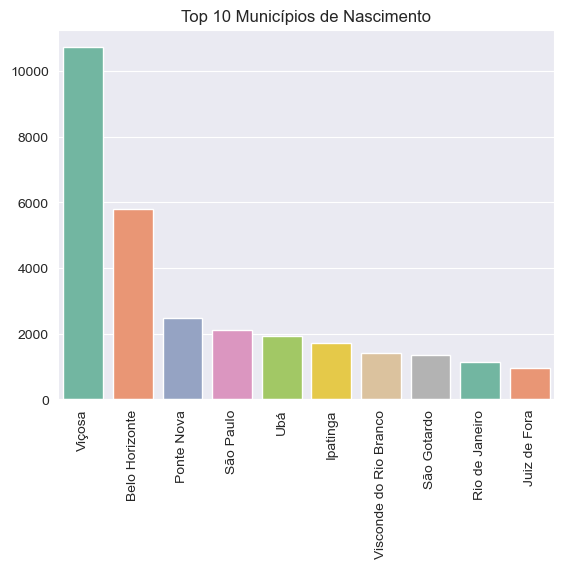

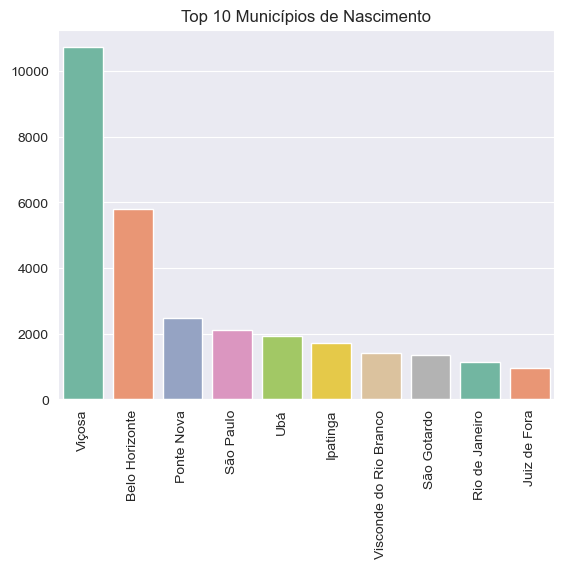

In [1723]:
mun10 = df['Municipio_Nascimento'].value_counts().nlargest(10)

sns.barplot(x=mun10.index, y=mun10.values, palette='Set2')
plt.xticks(rotation=90)
plt.title('Top 10 Municípios de Nascimento')
plt.show()

### Tratamento da coluna 'Admissao'

#### Dados da coluna
    - Tipo e quantidade de dados

In [1724]:
print("Tipo de dado: ", df['Admissao'].dtype)
print("Quantidade de dados: ", df['Admissao'].shape[0])

Tipo de dado:  object
Quantidade de dados:  72561
Tipo de dado:  object
Quantidade de dados:  72561


#### Valores nulos
    - Tratamento de valores nulos

In [1725]:
print(f"Quantidade de valores nulos: {df['Admissao'].isnull().sum()}")

Quantidade de valores nulos: 0
Quantidade de valores nulos: 0


#### Tratamento
    - Valores inválidos

##### Algumas admissões são inválidas. As que posssuem valores 0 no campo MM serão substituídas por 01 (YYYY/00 --> YYYY/01)

In [1726]:
df['Admissao'] = df['Admissao'].str.replace('/0', '/1')
df['Admissao'].value_counts()

2017/1    4000
2018/1    3928
2016/1    3918
2015/1    3894
2014/1    3874
2013/1    3805
2011/1    3782
2019/1    3724
2012/1    3560
2020/1    3549
2010/1    3345
2021/1    3183
2022/1    3166
2002/1    2726
2009/1    2597
2008/1    2326
2006/1    2248
2007/1    2043
2005/1    1911
2003/1    1869
2004/1    1829
2001/1    1700
2000/1    1385
2011/2     409
2009/2     400
2007/2     336
2010/2     314
2018/2     312
2008/2     309
2006/2     300
2017/2     276
2022/2     274
2016/2     239
2019/2     224
2003/2     174
2002/2     112
2005/2     109
2004/2      97
2021/2      64
2014/2      48
2020/2      45
2015/2      43
2000/2      35
2012/2      25
2001/2      25
2013/2      23
2020/4       5
2023/1       1
Name: Admissao, dtype: int64

2017/1    4000
2018/1    3928
2016/1    3918
2015/1    3894
2014/1    3874
2013/1    3805
2011/1    3782
2019/1    3724
2012/1    3560
2020/1    3549
2010/1    3345
2021/1    3183
2022/1    3166
2002/1    2726
2009/1    2597
2008/1    2326
2006/1    2248
2007/1    2043
2005/1    1911
2003/1    1869
2004/1    1829
2001/1    1700
2000/1    1385
2011/2     409
2009/2     400
2007/2     336
2010/2     314
2018/2     312
2008/2     309
2006/2     300
2017/2     276
2022/2     274
2016/2     239
2019/2     224
2003/2     174
2002/2     112
2005/2     109
2004/2      97
2021/2      64
2014/2      48
2020/2      45
2015/2      43
2000/2      35
2012/2      25
2001/2      25
2013/2      23
2020/4       5
2023/1       1
Name: Admissao, dtype: int64

#### Visualização
    - Histograma
    - Mais admissões

C:\Users\Miguel\AppData\Local\Temp\ipykernel_10776\1311368368.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ahp.set_xticklabels(ahp.get_xticklabels(), rotation=90)


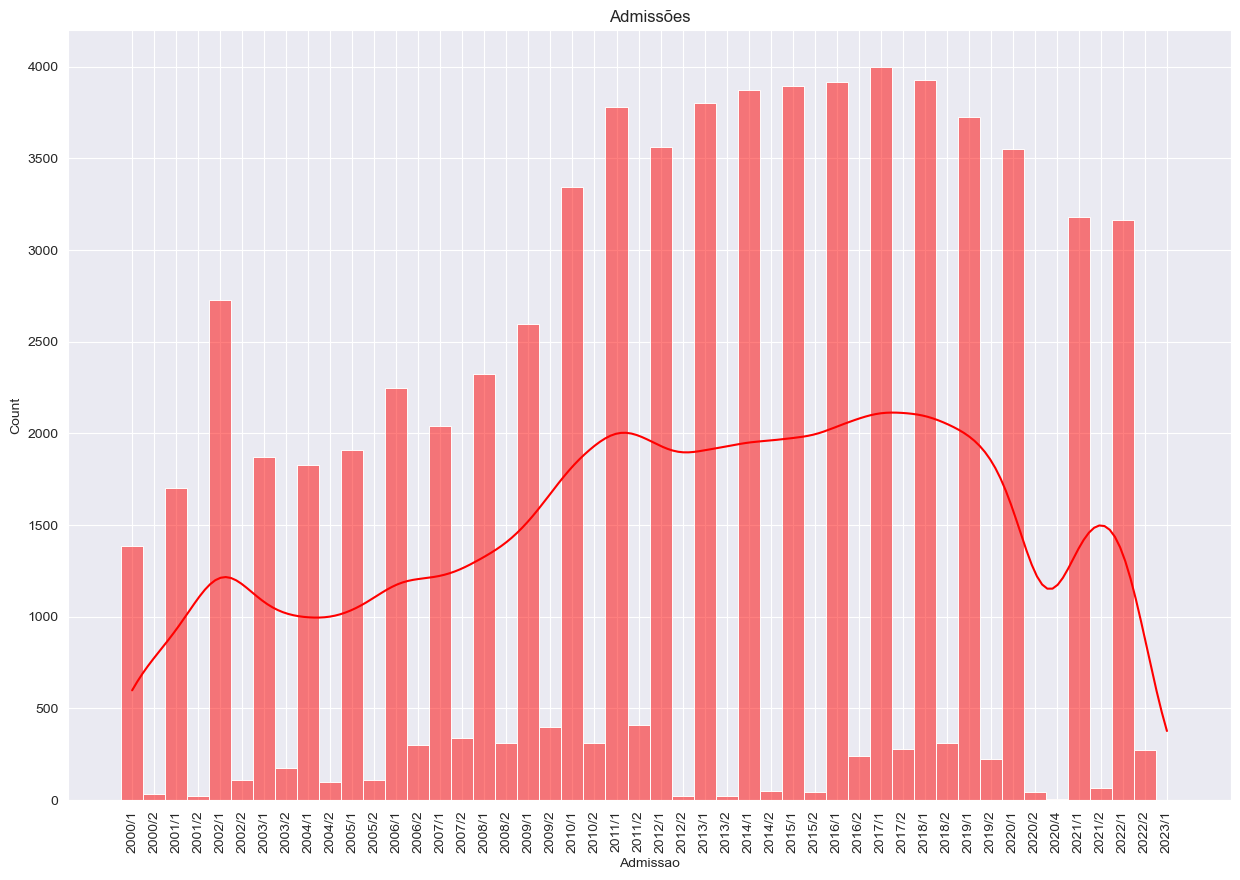

C:\Users\Miguel\AppData\Local\Temp\ipykernel_10776\1311368368.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ahp.set_xticklabels(ahp.get_xticklabels(), rotation=90)


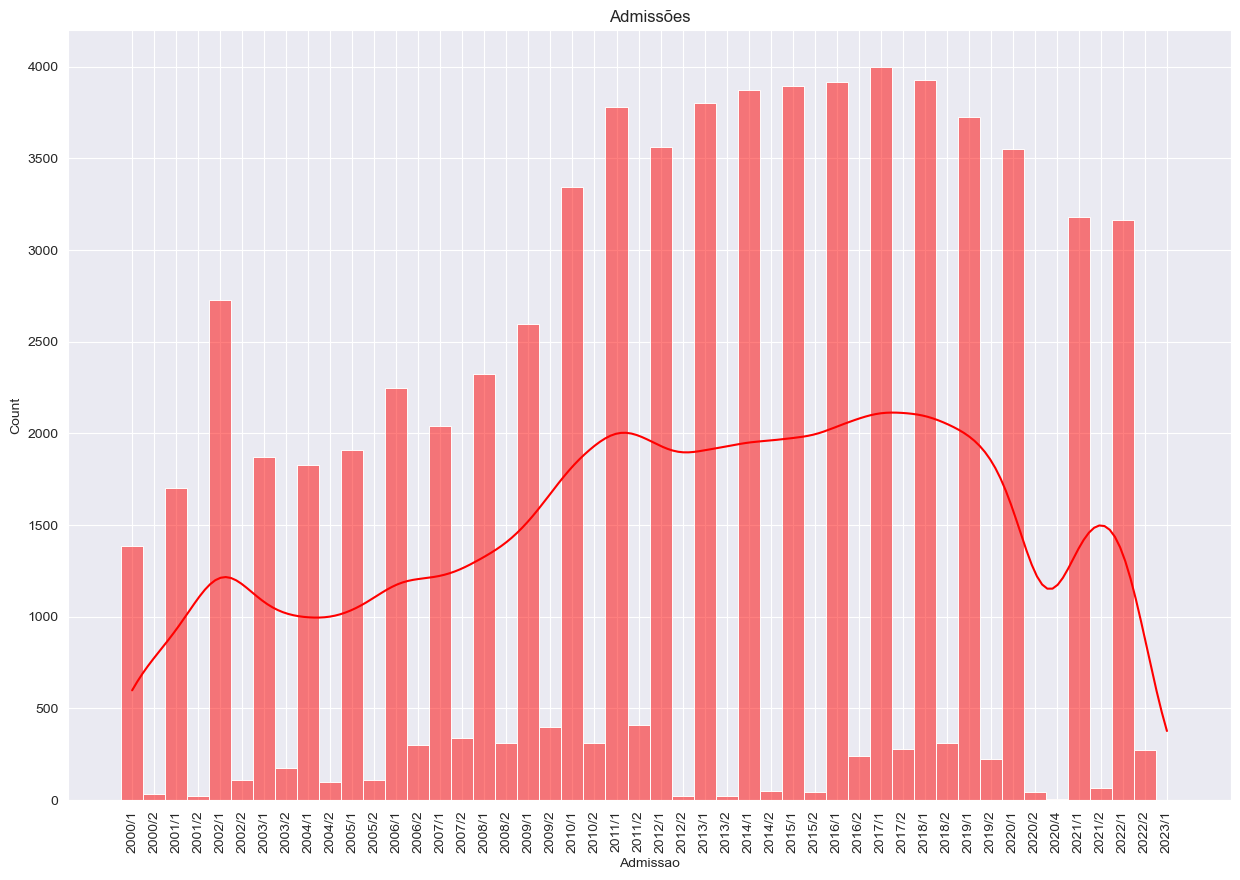

In [1727]:
ahp = sns.histplot(x=df['Admissao'], color='red', data=df, bins=20, kde=True)
ahp.set_xticklabels(ahp.get_xticklabels(), rotation=90)
ahp.figure.set_size_inches(15, 10)
plt.title('Admissões')
plt.show()

In [1728]:
df['Admissao'].value_counts().reset_index().rename(columns={'index': 'Admissao', 'Admissao': 'Quantidade'})

,Admissao,Quantidade
0,2017/1,4000
1,2018/1,3928
2,2016/1,3918
3,2015/1,3894
4,2014/1,3874
5,2013/1,3805
6,2011/1,3782
7,2019/1,3724
8,2012/1,3560
9,2020/1,3549


,Admissao,Quantidade
0,2017/1,4000
1,2018/1,3928
2,2016/1,3918
3,2015/1,3894
4,2014/1,3874
5,2013/1,3805
6,2011/1,3782
7,2019/1,3724
8,2012/1,3560
9,2020/1,3549


### Tratamento da coluna 'Saida'

#### Dados da coluna
    - Tipo e quantidade de dados

In [1729]:
print("Tipo de dado: ", df['Saida'].dtype)
print("Quantidade de dados: ", df['Saida'].shape[0])
df['Saida'].value_counts()

Tipo de dado:  object
Quantidade de dados:  72561


0         13659
2015/2     2563
2014/2     2490
2016/2     2370
2013/2     2314
          ...  
2021/0        4
2008/0        3
2009/0        1
2014/0        1
2005/0        1
Name: Saida, Length: 65, dtype: int64

Tipo de dado:  object
Quantidade de dados:  72561


0         13659
2015/2     2563
2014/2     2490
2016/2     2370
2013/2     2314
          ...  
2021/0        4
2008/0        3
2009/0        1
2014/0        1
2005/0        1
Name: Saida, Length: 65, dtype: int64

#### Valores nulos
    - Tratamento de valores nulos

In [1730]:
print(f"Quantidade de valores nulos: {df['Saida'].isnull().sum()}")

Quantidade de valores nulos: 0
Quantidade de valores nulos: 0


#### Tratamento
    - Valores inválidos

##### Algumas saídas são inválidas. As que posssuem valores 0 no campo MM serão substituídas por 01 (YYYY/00 --> YYYY/01)
##### A que possui 0, será substituída por 'CURSANDO', pois o aluno ainda está cursando

In [1731]:
df['Saida'] = df['Saida'].replace(0, 'CURSANDO')
df['Saida'] = df['Saida'].str.replace('/0', '/1')

In [1732]:
df['Saida'].value_counts().reset_index().rename(columns={'index': 'Saida', 'Saida': 'Quantidade'})

,Saida,Quantidade
0,CURSANDO,13659
1,2015/2,2563
2,2014/2,2490
3,2016/2,2370
4,2013/2,2314
5,2017/2,2310
6,2021/2,2277
7,2018/2,2246
8,2012/2,2149
9,2019/2,2103


,Saida,Quantidade
0,CURSANDO,13659
1,2015/2,2563
2,2014/2,2490
3,2016/2,2370
4,2013/2,2314
5,2017/2,2310
6,2021/2,2277
7,2018/2,2246
8,2012/2,2149
9,2019/2,2103


### Visualização
    - Histograma
    - Mais saídas

C:\Users\Miguel\AppData\Local\Temp\ipykernel_10776\622357870.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  shp.set_xticklabels(shp.get_xticklabels(), rotation=90)


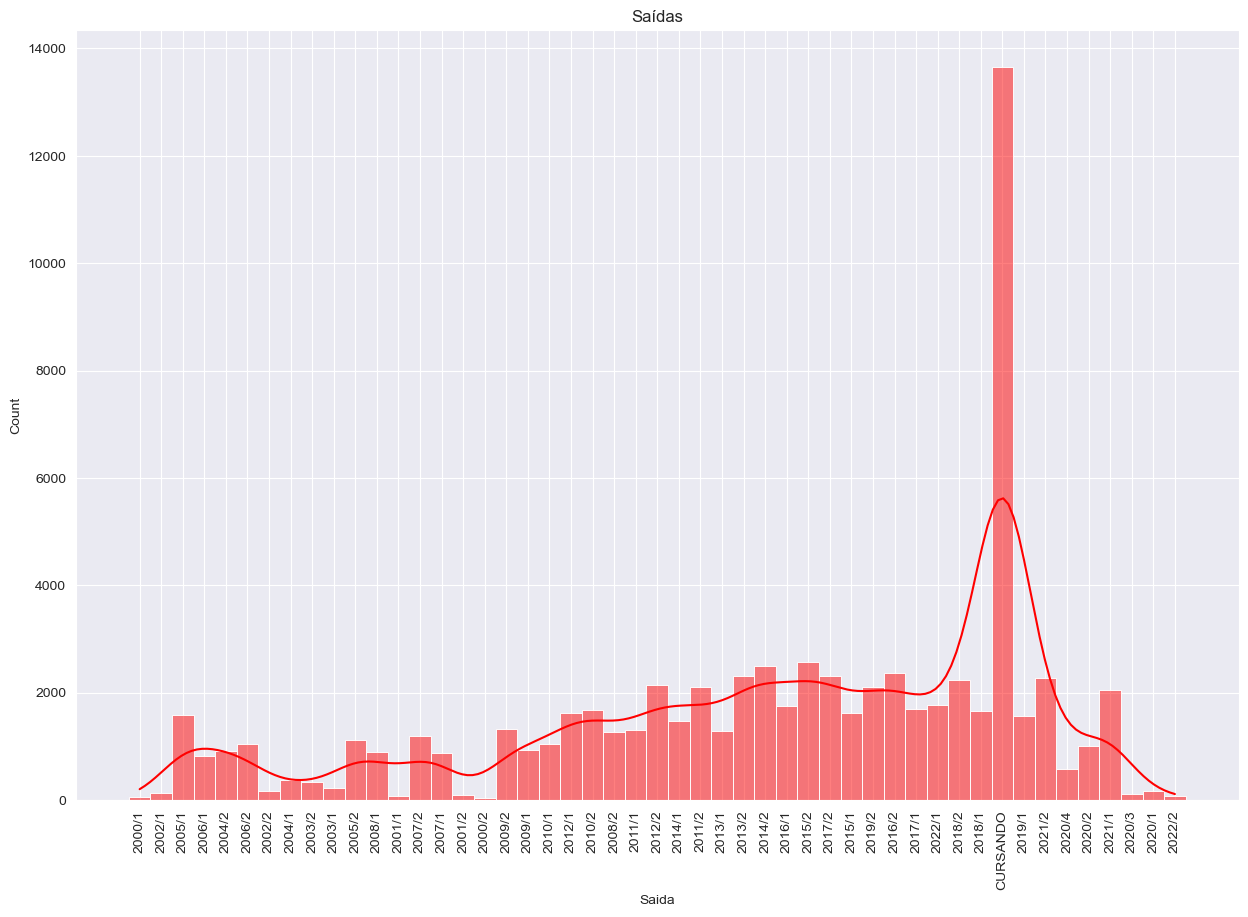

C:\Users\Miguel\AppData\Local\Temp\ipykernel_10776\622357870.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  shp.set_xticklabels(shp.get_xticklabels(), rotation=90)


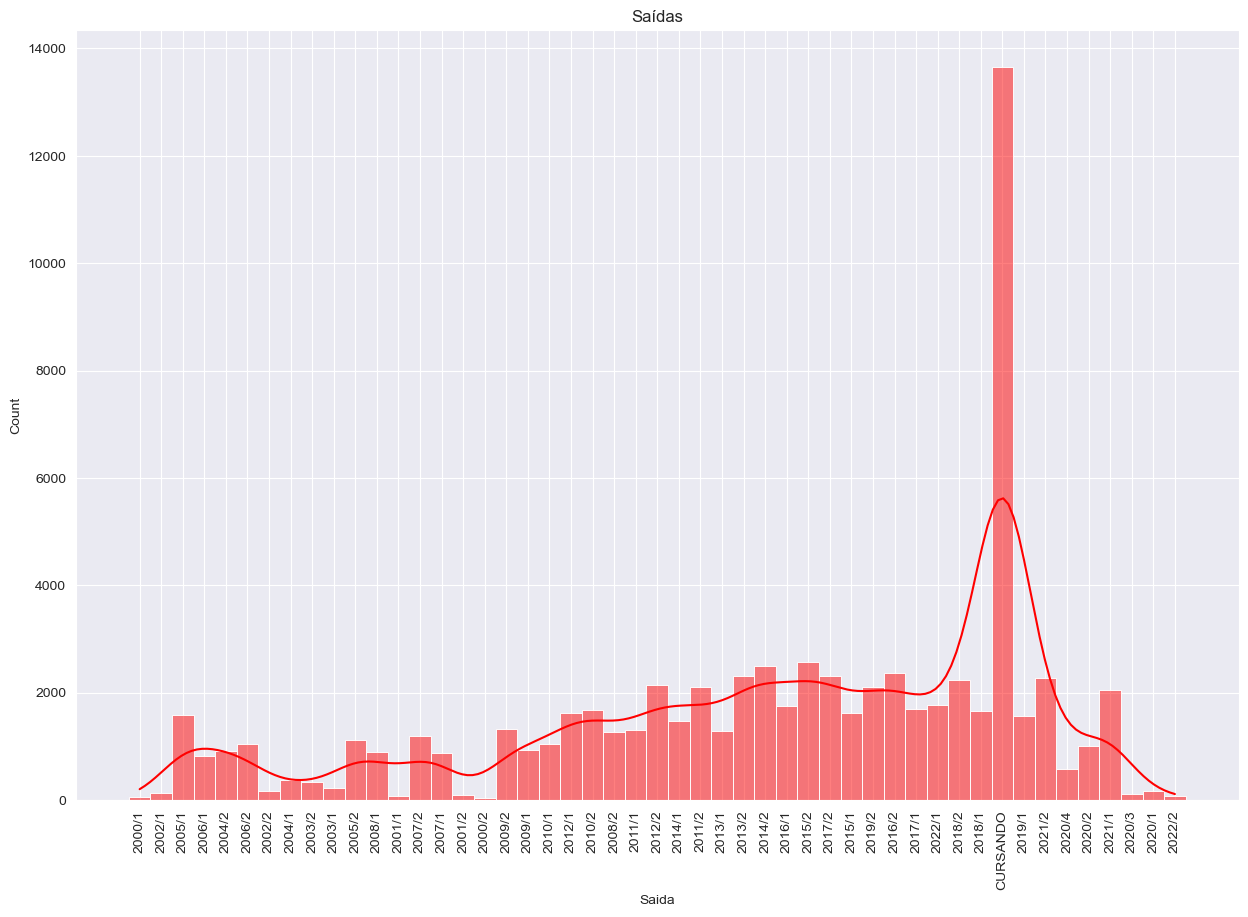

In [1733]:
shp = sns.histplot(x=df['Saida'], color='red', data=df, bins=20, kde=True)
shp.set_xticklabels(shp.get_xticklabels(), rotation=90)
shp.figure.set_size_inches(15, 10)
plt.title('Saídas')
plt.show()

In [1734]:
df['Saida'].value_counts().reset_index().rename(columns={'index': 'Saida', 'Saida': 'Quantidade'})

,Saida,Quantidade
0,CURSANDO,13659
1,2015/2,2563
2,2014/2,2490
3,2016/2,2370
4,2013/2,2314
5,2017/2,2310
6,2021/2,2277
7,2018/2,2246
8,2012/2,2149
9,2019/2,2103


,Saida,Quantidade
0,CURSANDO,13659
1,2015/2,2563
2,2014/2,2490
3,2016/2,2370
4,2013/2,2314
5,2017/2,2310
6,2021/2,2277
7,2018/2,2246
8,2012/2,2149
9,2019/2,2103


### Tratamento da coluna 'Codigo_Situacao_Aluno'

#### Dados da coluna
    - Valores únicos
    - Agrpados com Situação do Aluno

In [1735]:
print("Valores únicos: ", df['Codigo_Situacao_Aluno'].unique())
print("Quantidade de valores únicos: ", df['Codigo_Situacao_Aluno'].nunique())

Valores únicos:  ['A' 'C' 'M' 'T' 'D' 'F' 'X' 'H' 'B' 'N' 'S' 'I' 'Q' 'R' 'K' 'W' 'G' 'Y'
 'Z' 'J']
Quantidade de valores únicos:  20
Valores únicos:  ['A' 'C' 'M' 'T' 'D' 'F' 'X' 'H' 'B' 'N' 'S' 'I' 'Q' 'R' 'K' 'W' 'G' 'Y'
 'Z' 'J']
Quantidade de valores únicos:  20


In [1736]:
df.groupby(['Codigo_Situacao_Aluno', 'Situacao_Aluno']).size().reset_index().rename(columns={0: 'Quantidade'})

,Codigo_Situacao_Aluno,Situacao_Aluno,Quantidade
0,A,Abandono ...,12710
1,A,Estudante em abandono de curso ...,3483
2,B,Concluindo (não colou grau) ...,2
3,B,Concluinte (não colou grau) ...,2
4,B,Concluiu as exigências do curso (não colou gra...,16
5,C,Conclusão ...,30869
6,D,Desligamento ...,6239
7,F,Falecimento ...,37
8,G,Afastamento/Intercâmbio ...,48
9,H,Habilitação ...,2


,Codigo_Situacao_Aluno,Situacao_Aluno,Quantidade
0,A,Abandono ...,12710
1,A,Estudante em abandono de curso ...,3483
2,B,Concluindo (não colou grau) ...,2
3,B,Concluinte (não colou grau) ...,2
4,B,Concluiu as exigências do curso (não colou gra...,16
5,C,Conclusão ...,30869
6,D,Desligamento ...,6239
7,F,Falecimento ...,37
8,G,Afastamento/Intercâmbio ...,48
9,H,Habilitação ...,2


#### Valores nulos
    - Tratamento de valores nulos

In [1737]:
print(f"Quantidade de valores nulos: {df['Codigo_Situacao_Aluno'].isnull().sum()}")

Quantidade de valores nulos: 0
Quantidade de valores nulos: 0


#### Tratamento
    - Valores repetidos
    - Remoção de colunas

In [1738]:
# Código: A --> Situação: Abandono

df.loc[df['Codigo_Situacao_Aluno'] == 'A', 'Situacao_Aluno'] = 'Abandono'

# Código: B --> Situação: Conclusão (Não Colou Grau)

df.loc[df['Codigo_Situacao_Aluno'] == 'B', 'Situacao_Aluno'] = 'Conclusão/Não Colou Grau'

# Código: Z --> Situação: Trancamento por Motivo de Saúde

df.loc[df['Codigo_Situacao_Aluno'] == 'Z', 'Situacao_Aluno'] = 'Trancamento por Motivo de Saúde'

df.groupby(['Codigo_Situacao_Aluno', 'Situacao_Aluno']).size().reset_index().rename(columns={0: 'Quantidade'})

,Codigo_Situacao_Aluno,Situacao_Aluno,Quantidade
0,A,Abandono,16193
1,B,Conclusão/Não Colou Grau,20
2,C,Conclusão ...,30869
3,D,Desligamento ...,6239
4,F,Falecimento ...,37
5,G,Afastamento/Intercâmbio ...,48
6,H,Habilitação ...,2
7,I,Concluinte (relatório não analisado) ...,6
8,J,Matrícula Suspensa Temporariamente ...,1
9,K,Trancamento ...,320


,Codigo_Situacao_Aluno,Situacao_Aluno,Quantidade
0,A,Abandono,16193
1,B,Conclusão/Não Colou Grau,20
2,C,Conclusão ...,30869
3,D,Desligamento ...,6239
4,F,Falecimento ...,37
5,G,Afastamento/Intercâmbio ...,48
6,H,Habilitação ...,2
7,I,Concluinte (relatório não analisado) ...,6
8,J,Matrícula Suspensa Temporariamente ...,1
9,K,Trancamento ...,320


##### Situações que possuem menos de 8 alunos serão excluídas, pois não possuem relevância para a análise

In [1739]:
situacaoAluno = df['Situacao_Aluno'].value_counts().reset_index().rename(columns={'index': 'Situacao_Aluno', 'Situacao_Aluno': 'Quantidade'})
situacaoAluno = situacaoAluno[situacaoAluno['Quantidade'] >= 8]
situacaoAluno

,Situacao_Aluno,Quantidade
0,Conclusão ...,30869
1,Abandono,16193
2,Normal ...,13194
3,Desligamento ...,6239
4,Mudança de Curso ...,5180
5,Trancamento ...,320
6,Transferência ...,318
7,Trancamento por Motivo de Saúde,51
8,Afastamento/Intercâmbio ...,48
9,Afastamento Especial ...,45


,Situacao_Aluno,Quantidade
0,Conclusão ...,30869
1,Abandono,16193
2,Normal ...,13194
3,Desligamento ...,6239
4,Mudança de Curso ...,5180
5,Trancamento ...,320
6,Transferência ...,318
7,Trancamento por Motivo de Saúde,51
8,Afastamento/Intercâmbio ...,48
9,Afastamento Especial ...,45


In [1740]:
df.drop(df[~df['Situacao_Aluno'].isin(situacaoAluno['Situacao_Aluno'])].index, inplace=True)

In [1741]:
df.groupby(['Codigo_Situacao_Aluno', 'Situacao_Aluno']).size().reset_index().rename(columns={0: 'Quantidade'})

,Codigo_Situacao_Aluno,Situacao_Aluno,Quantidade
0,A,Abandono,16193
1,B,Conclusão/Não Colou Grau,20
2,C,Conclusão ...,30869
3,D,Desligamento ...,6239
4,F,Falecimento ...,37
5,G,Afastamento/Intercâmbio ...,48
6,K,Trancamento ...,320
7,M,Mudança de Curso ...,5180
8,N,Normal ...,13194
9,S,Anulação de Matrícula ...,8


,Codigo_Situacao_Aluno,Situacao_Aluno,Quantidade
0,A,Abandono,16193
1,B,Conclusão/Não Colou Grau,20
2,C,Conclusão ...,30869
3,D,Desligamento ...,6239
4,F,Falecimento ...,37
5,G,Afastamento/Intercâmbio ...,48
6,K,Trancamento ...,320
7,M,Mudança de Curso ...,5180
8,N,Normal ...,13194
9,S,Anulação de Matrícula ...,8


#### Visualização
    - Gráfico de Contagem

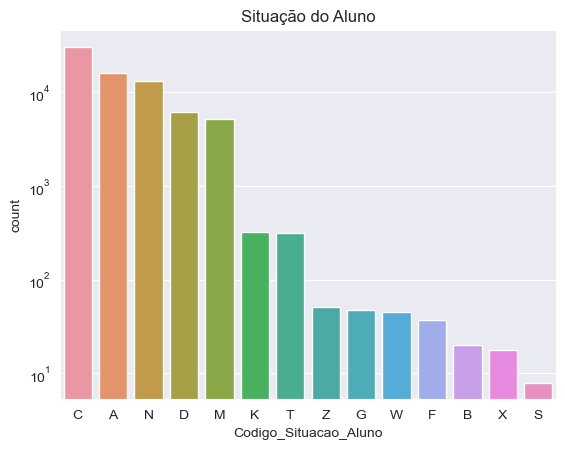

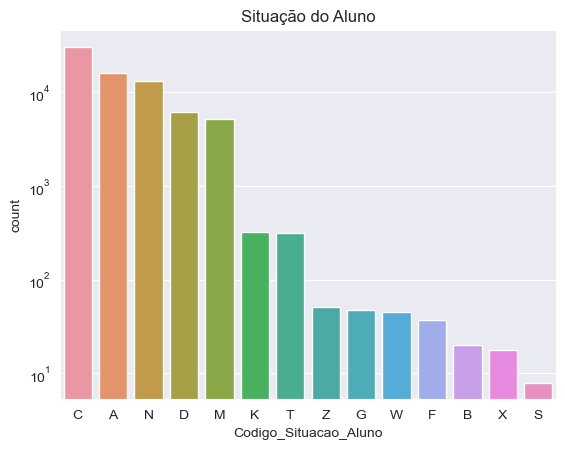

In [1742]:
sns.set_palette("Blues")
sns.countplot(x='Codigo_Situacao_Aluno', data=df, order=df['Codigo_Situacao_Aluno'].value_counts().index)
plt.title('Situação do Aluno')
plt.yscale('log')
plt.show()

### Tratamento da coluna 'Situacao_Aluno'

#### Dados da coluna
    - Valores únicos


In [1743]:
print("Valores únicos: ", df['Situacao_Aluno'].unique())

Valores únicos:  ['Abandono' 'Conclusão                                         '
 'Mudança de Curso                                  '
 'Transferência                                     '
 'Desligamento                                      '
 'Falecimento                                       '
 'Exclusão                                          '
 'Conclusão/Não Colou Grau'
 'Normal                                            '
 'Anulação de Matrícula                             '
 'Trancamento                                       '
 'Afastamento Especial                              '
 'Afastamento/Intercâmbio                           '
 'Trancamento por Motivo de Saúde']
Valores únicos:  ['Abandono' 'Conclusão                                         '
 'Mudança de Curso                                  '
 'Transferência                                     '
 'Desligamento                                      '
 'Falecimento                                       '
 'Exclusão      

#### Valores nulos
    - Tratamento de valores nulos

In [1744]:
print(f"Quantidade de valores nulos: {df['Situacao_Aluno'].isnull().sum()}")

Quantidade de valores nulos: 0
Quantidade de valores nulos: 0


#### Tratamento
    - Remoção de espaços vazios

In [1745]:
df['Situacao_Aluno'] = df['Situacao_Aluno'].str.strip()
df['Situacao_Aluno'].value_counts().reset_index().rename(columns={'index': 'Situacao_Aluno', 'Situacao_Aluno': 'Quantidade'})

,Situacao_Aluno,Quantidade
0,Conclusão,30869
1,Abandono,16193
2,Normal,13194
3,Desligamento,6239
4,Mudança de Curso,5180
5,Trancamento,320
6,Transferência,318
7,Trancamento por Motivo de Saúde,51
8,Afastamento/Intercâmbio,48
9,Afastamento Especial,45


,Situacao_Aluno,Quantidade
0,Conclusão,30869
1,Abandono,16193
2,Normal,13194
3,Desligamento,6239
4,Mudança de Curso,5180
5,Trancamento,320
6,Transferência,318
7,Trancamento por Motivo de Saúde,51
8,Afastamento/Intercâmbio,48
9,Afastamento Especial,45


#### Visualização
    - Gráfico de Contagem

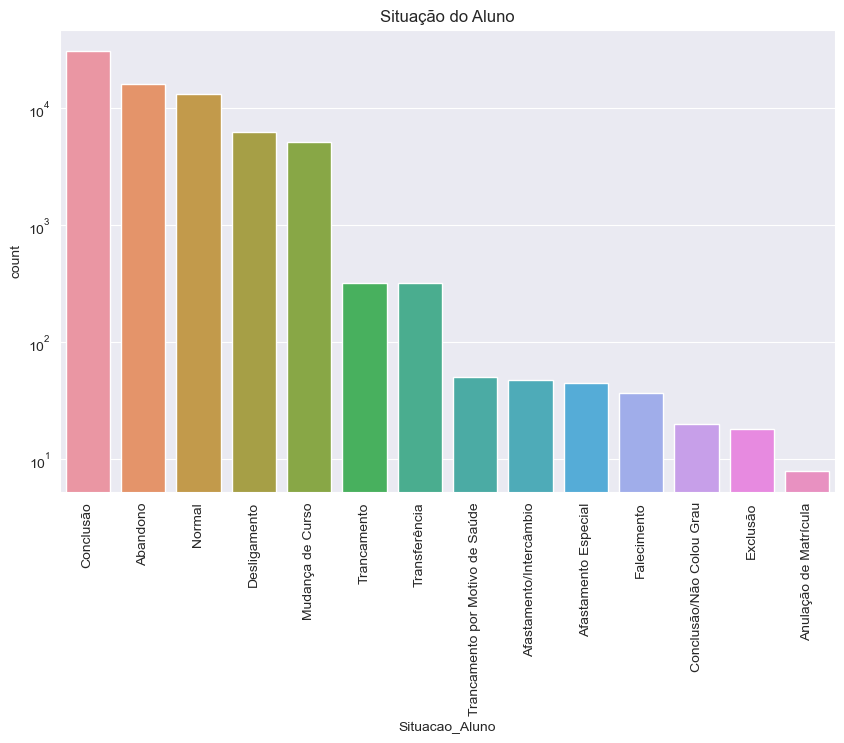

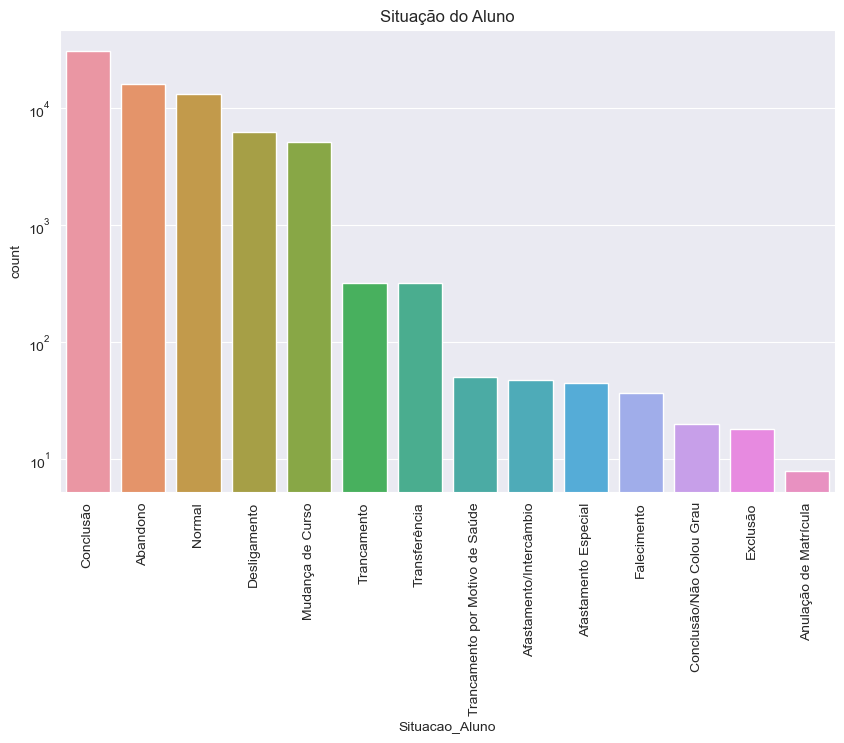

In [1746]:
scp = sns.countplot(x='Situacao_Aluno', data=df, order=df['Situacao_Aluno'].value_counts().index)
scp.set_xticklabels(scp.get_xticklabels(), rotation=90)
scp.figure.set_size_inches(10, 6)
plt.title('Situação do Aluno')
plt.yscale('log')
plt.show()



### Tratamento da coluna 'Situacao_Aluno_Agrupada'

#### Dados da coluna
    - Valores únicos


In [1747]:
print("Valores únicos: ", df['Situacao_Aluno_Agrupada'].unique())

Valores únicos:  ['Evasão' 'Conclusão' 'Retenção' 'Matriculado']
Valores únicos:  ['Evasão' 'Conclusão' 'Retenção' 'Matriculado']


#### Valores nulos
    - Tratamento de valores nulos

In [1748]:
print(f"Quantidade de valores nulos: {df['Situacao_Aluno_Agrupada'].isnull().sum()}")

Quantidade de valores nulos: 0
Quantidade de valores nulos: 0


In [1749]:
df['Situacao_Aluno_Agrupada'].value_counts().reset_index().rename(columns={'index': 'Situacao_Aluno_Agrupada', 'Situacao_Aluno_Agrupada': 'Quantidade'})

,Situacao_Aluno_Agrupada,Quantidade
0,Conclusão,30889
1,Evasão,27993
2,Matriculado,11185
3,Retenção,2473


,Situacao_Aluno_Agrupada,Quantidade
0,Conclusão,30889
1,Evasão,27993
2,Matriculado,11185
3,Retenção,2473


#### Visualização
    - Gráfico de Contagem

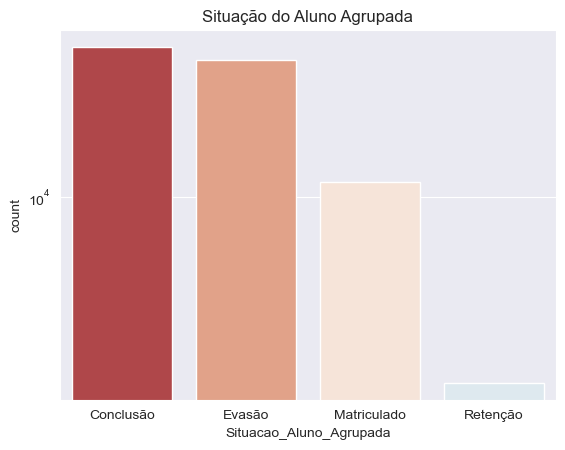

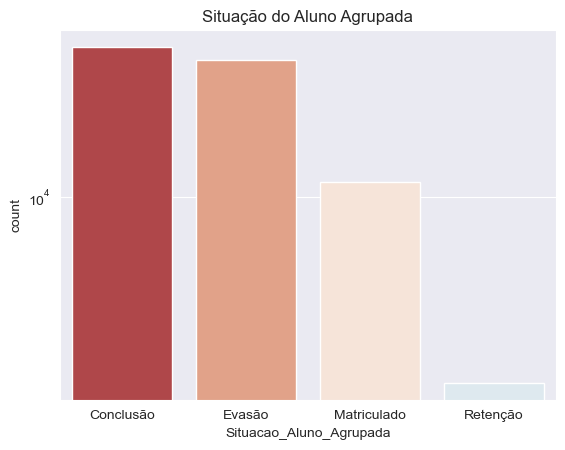

In [1750]:
sns.set_palette("RdBu")
sns.countplot(x='Situacao_Aluno_Agrupada', data=df, order=df['Situacao_Aluno_Agrupada'].value_counts().index)
plt.title('Situação do Aluno Agrupada')
plt.yscale('log')
plt.show()

### Tratamento da coluna 'Modalidade_Inscrita'

#### Dados da coluna
    - Valores únicos
    - Quantidade de alunos
    - Tipo de dado

In [1751]:
print("Valores únicos: ", df['Modalidade_Inscrita'].unique())
print(f"Tipo de dado: {df['Modalidade_Inscrita'].dtype}")

Valores únicos:  [ 0. nan  9.  1.  3.  7.  5.  8.  4.  6.  2.]
Tipo de dado: float64
Valores únicos:  [ 0. nan  9.  1.  3.  7.  5.  8.  4.  6.  2.]
Tipo de dado: float64


In [1752]:
df['Modalidade_Inscrita'].value_counts().reset_index().rename(columns={'index': 'Modalidade_Inscrita', 'Modalidade_Inscrita': 'Quantidade'})

,Modalidade_Inscrita,Quantidade
0,0.0,32045
1,9.0,19204
2,1.0,4851
3,5.0,4578
4,3.0,3306
5,7.0,3245
6,8.0,85
7,4.0,54
8,6.0,45
9,2.0,30


,Modalidade_Inscrita,Quantidade
0,0.0,32045
1,9.0,19204
2,1.0,4851
3,5.0,4578
4,3.0,3306
5,7.0,3245
6,8.0,85
7,4.0,54
8,6.0,45
9,2.0,30


##### Valores nulos não serão tratados, pois não possuem relevância para a análise

In [1753]:
print(f"Quantidade de valores nulos: {df['Modalidade_Inscrita'].isnull().sum()}")

Quantidade de valores nulos: 5097
Quantidade de valores nulos: 5097


In [1754]:
df['Modalidade_Inscrita'].value_counts().reset_index().rename(columns={'index': 'Modalidade_Inscrita', 'Modalidade_Inscrita': 'Quantidade'})

,Modalidade_Inscrita,Quantidade
0,0.0,32045
1,9.0,19204
2,1.0,4851
3,5.0,4578
4,3.0,3306
5,7.0,3245
6,8.0,85
7,4.0,54
8,6.0,45
9,2.0,30


,Modalidade_Inscrita,Quantidade
0,0.0,32045
1,9.0,19204
2,1.0,4851
3,5.0,4578
4,3.0,3306
5,7.0,3245
6,8.0,85
7,4.0,54
8,6.0,45
9,2.0,30


#### Visualização
    - Gráfico de Contagem

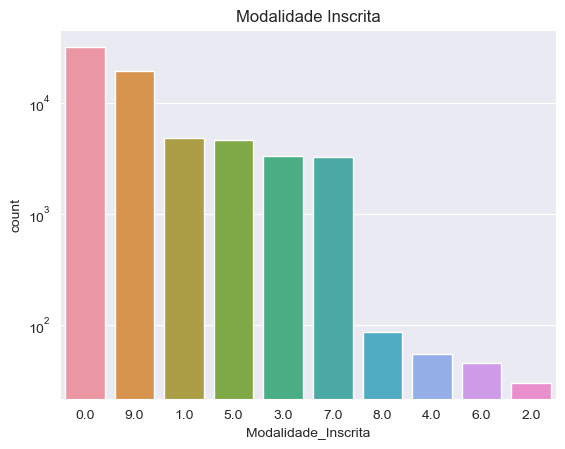

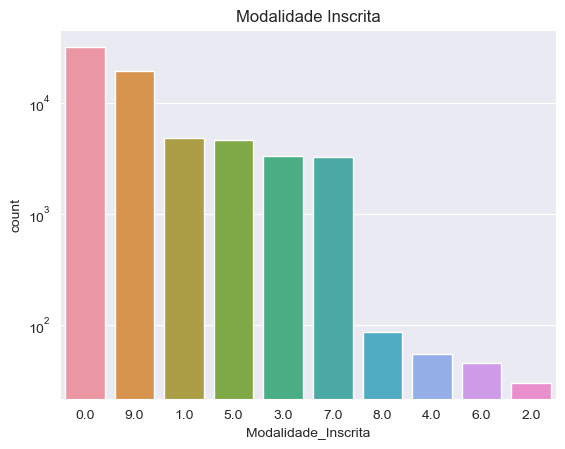

In [1755]:
sns.countplot(x='Modalidade_Inscrita', data=df, order=df['Modalidade_Inscrita'].value_counts().index)
plt.title('Modalidade Inscrita')
plt.yscale('log')
plt.show()

#### Tratamento da coluna 'ENEM

#### Dados da coluna
    - Descrição dos dados
    - Quantidade de alunos
    - Tipo de dado

In [1756]:
print(f"Tipo de dado: {df['ENEM'].dtype}")
df['ENEM'].describe()

Tipo de dado: float64


count    38665.000000
mean       629.077198
std         68.831514
min        253.240000
25%        587.500000
50%        634.540000
75%        676.220000
max        847.380000
Name: ENEM, dtype: float64

Tipo de dado: float64


count    38665.000000
mean       629.077198
std         68.831514
min        253.240000
25%        587.500000
50%        634.540000
75%        676.220000
max        847.380000
Name: ENEM, dtype: float64

In [1757]:
df['ENEM'].value_counts().reset_index().rename(columns={'index': 'ENEM', 'ENEM': 'Quantidade'})

,ENEM,Quantidade
0,671.38,14
1,673.30,13
2,631.32,13
3,646.34,13
4,622.88,13
...,...,...
13130,707.64,1
13131,727.12,1
13132,456.98,1
13133,785.86,1


,ENEM,Quantidade
0,671.38,14
1,673.30,13
2,631.32,13
3,646.34,13
4,622.88,13
...,...,...
13130,707.64,1
13131,727.12,1
13132,456.98,1
13133,785.86,1


#### Valores nulos
    - Tratamento de valores nulos

##### Valores nulos não serão tratados, pois não possuem relevância para a análise

In [1758]:
print(f"Quantidade de valores nulos: {df['ENEM'].isnull().sum()}")

Quantidade de valores nulos: 33875
Quantidade de valores nulos: 33875


#### Visualização
    - Boxplot
    - Violinplot
    - Histograma
    - Boxplot por Modalidade_Inscrita
    - BoxPlot por CRA
    - Violinplot por Modalidade_Inscrita
    - Correlação entre ENEM e Modalidade_Inscrita

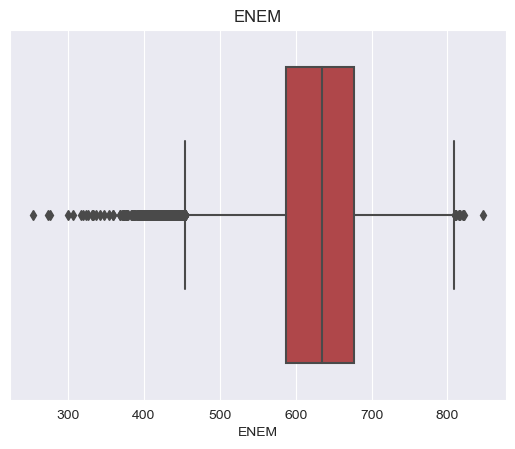

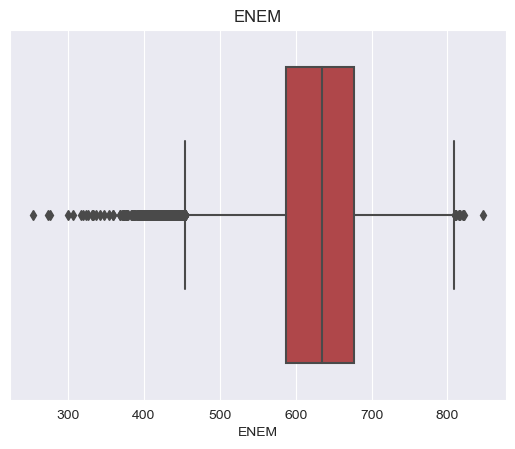

In [1759]:
sns.boxplot(x='ENEM', data=df)
plt.title('ENEM')
plt.show()

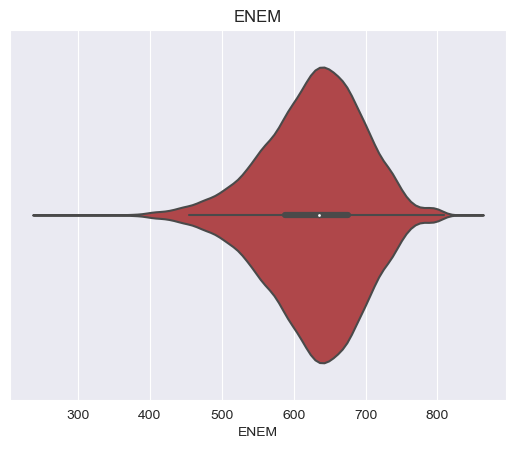

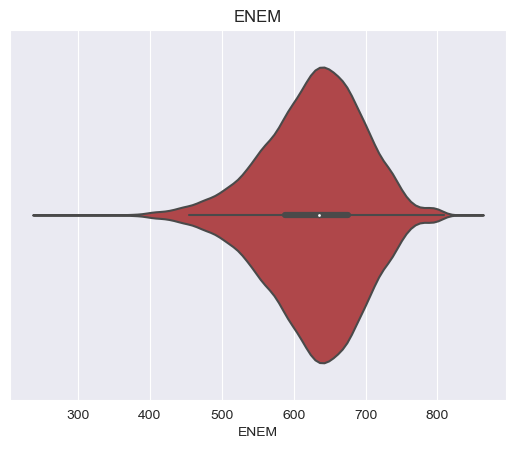

In [1760]:
sns.violinplot(x='ENEM', data=df)
plt.title('ENEM')
plt.show()


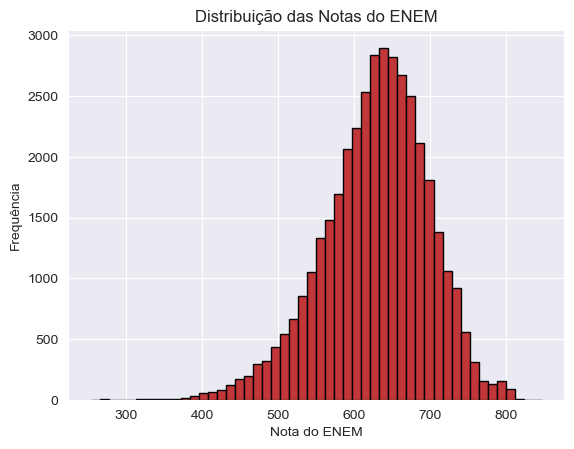

In [1766]:
plt.hist(df['ENEM'], bins=50, edgecolor='black' )
plt.xlabel('Nota do ENEM')
plt.ylabel('Frequência')
plt.title('Distribuição das Notas do ENEM')
plt.show()

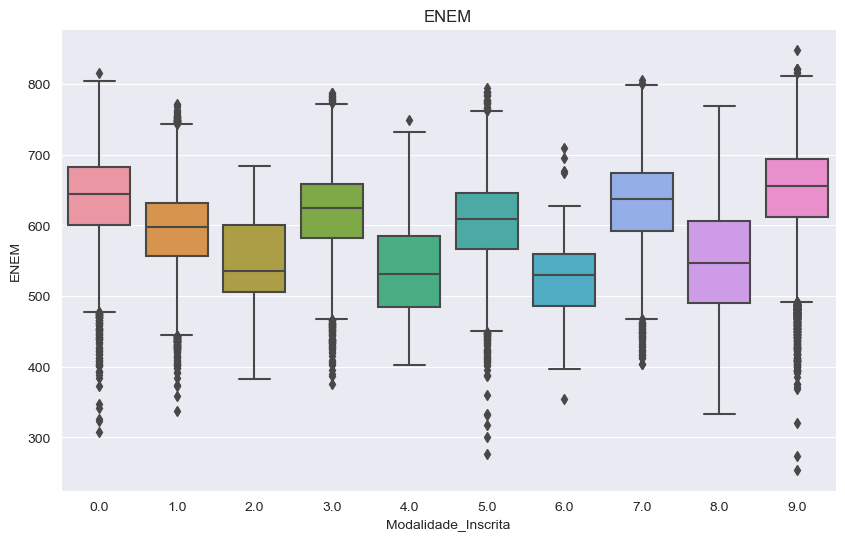

In [1764]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Modalidade_Inscrita', y='ENEM', data=df)
plt.title('ENEM')
plt.show()

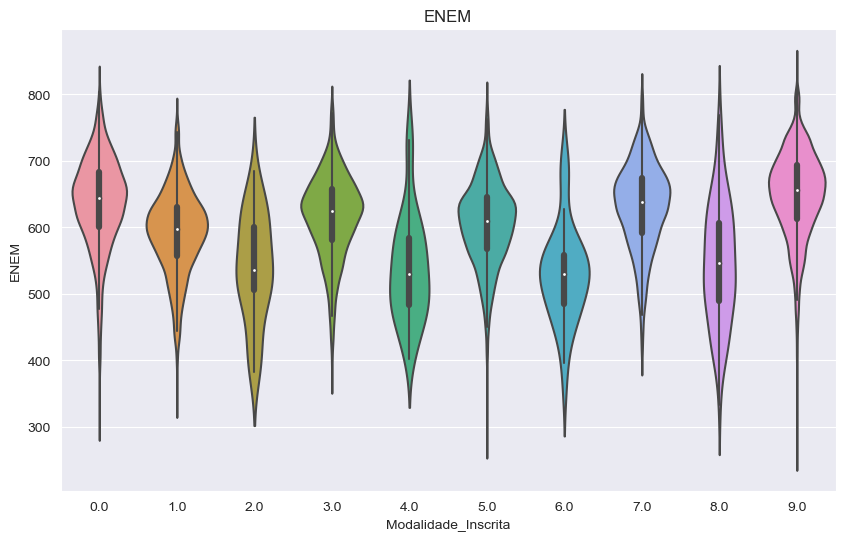

In [1765]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Modalidade_Inscrita', y='ENEM', data=df)
plt.title('ENEM')
plt.show()

<Axes: >

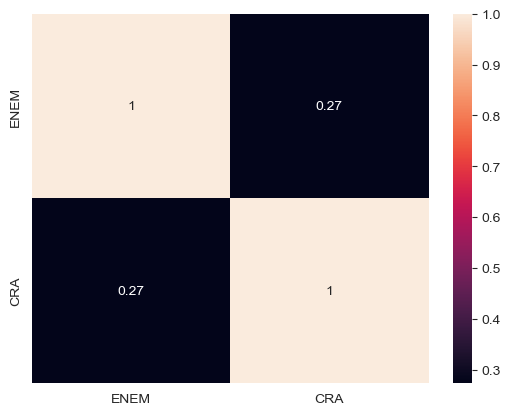

In [1777]:
sns.heatmap(df[['ENEM', 'Modalidade_Inscrita']].corr(), annot=True)

#### Tratamento da coluna 'CRA'

#### Dados da coluna
    - Descrição dos dados
    - Quantidade de alunos
    - Tipo de dado

In [1792]:
print(f"Tipo de dado: {df['CRA'].dtype}")
df['CRA'].describe()

Tipo de dado: float64


count    72535.000000
mean        61.963249
std         24.296267
min          0.000000
25%         51.500000
50%         69.600000
75%         79.400000
max        100.000000
Name: CRA, dtype: float64

In [1793]:
df['CRA'].value_counts().reset_index().rename(columns={'index': 'CRA', 'CRA': 'Quantidade'})

,CRA,Quantidade
0,0.0,3782
1,79.2,234
2,76.0,230
3,76.6,230
4,80.0,228
...,...,...
986,99.5,1
987,99.3,1
988,98.6,1
989,98.3,1


#### Valores nulos
    - Tratamento de valores nulos

##### Valores nulos não serão tratados, pois não possuem relevância para a análise

In [1795]:
print(f"Quantidade de valores nulos: {df['CRA'].isnull().sum()}")

Quantidade de valores nulos: 5


####  Outliers
    - Tratamento de outliers

##### Valor 0 será substituído por NaN

In [1803]:
df['CRA'] = df['CRA'].replace(0, np.nan)

In [1804]:
df['CRA'].describe()

count    68753.000000
mean        65.371755
std         19.998945
min          0.100000
25%         55.800000
50%         70.800000
75%         79.800000
max        100.000000
Name: CRA, dtype: float64

In [1805]:
df['CRA'].value_counts().reset_index().rename(columns={'index': 'CRA', 'CRA': 'Quantidade'})

,CRA,Quantidade
0,79.2,234
1,76.0,230
2,76.6,230
3,80.0,228
4,77.1,227
...,...,...
985,99.5,1
986,99.3,1
987,98.6,1
988,98.3,1


#### Visualização
    - Boxplot
    - Violinplot
    - Histograma
    - Boxplot por Modalidade_Inscrita

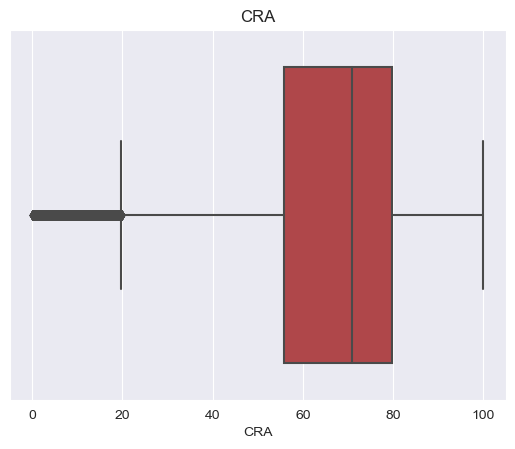

In [1806]:
sns.boxplot(x='CRA', data=df)
plt.title('CRA')
plt.show()

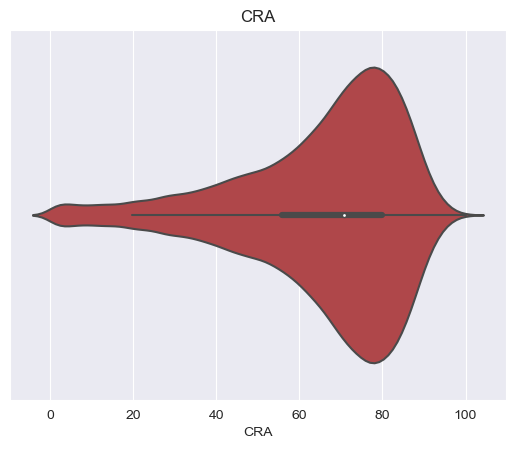

In [1807]:
sns.violinplot(x='CRA', data=df)
plt.title('CRA')
plt.show()

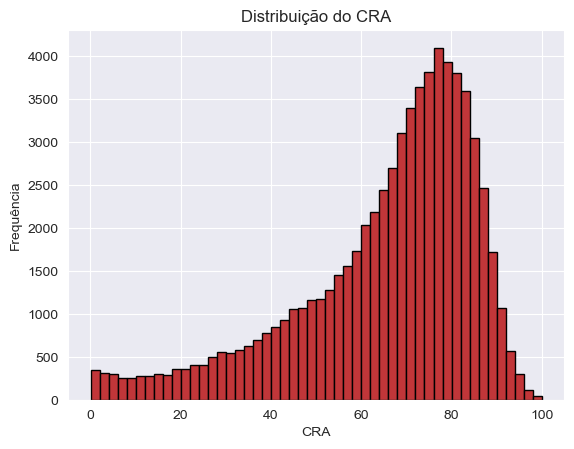

In [1808]:
plt.hist(df['CRA'], bins=50, edgecolor='black' )
plt.xlabel('CRA')
plt.ylabel('Frequência')
plt.title('Distribuição do CRA')
plt.show()

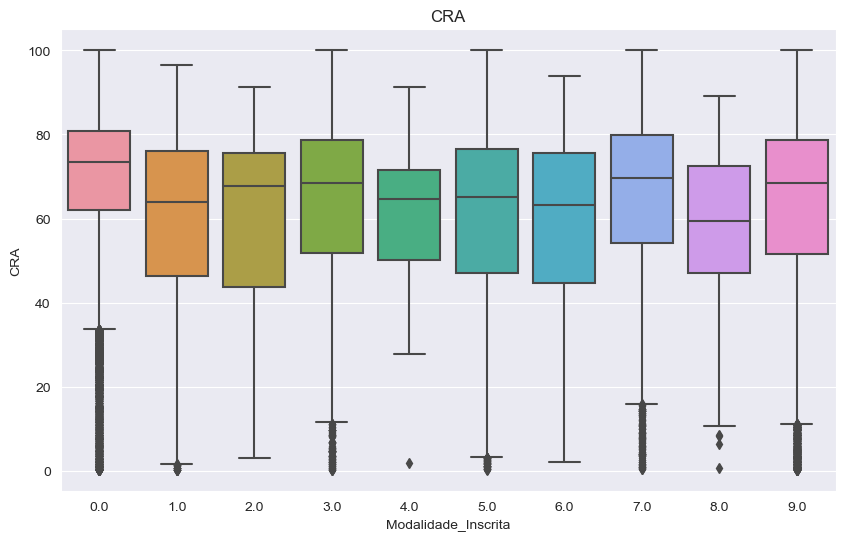

In [1809]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Modalidade_Inscrita', y='CRA', data=df)
plt.title('CRA')
plt.show()

<Figure size 1000x800 with 0 Axes>

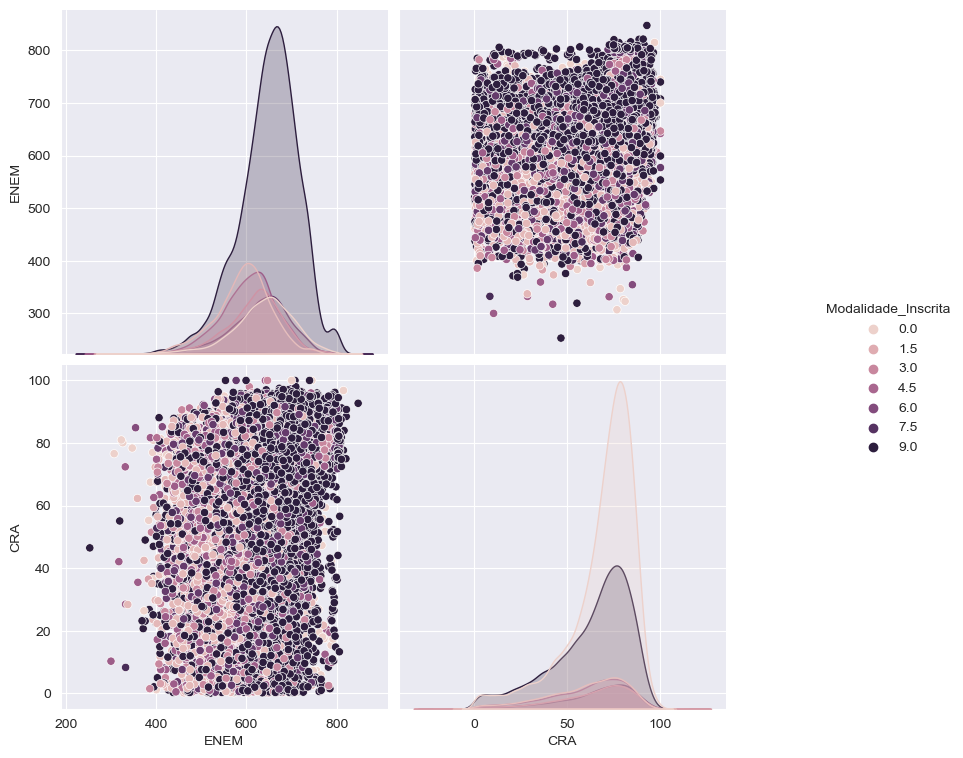

In [1817]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecionar as colunas relevantes
data = df[['ENEM', 'CRA', 'Modalidade_Inscrita']]

# Configurar o tamanho da figura
plt.figure(figsize=(10, 8))

# Plotar a matriz de dispersão
g = sns.pairplot(data, hue='Modalidade_Inscrita')

# Ajustar o tamanho da figura
g.fig.set_size_inches(10, 8)

# Exibir o gráfico
plt.show()



In [1818]:
df

,Identificador,Ano_Nascimento,Sexo,Campus,Curso_Identificador,Curso,UF_Nascimento,Municipio_Nascimento,Admissao,Saida,Codigo_Situacao_Aluno,Situacao_Aluno,Situacao_Aluno_Agrupada,Modalidade_Inscrita,ENEM,Num_Reprovacoes,Raca,CRA
0,29271,1982,M,CAV,1101,CAV - Administração,RJ,Volta Redonda,2000/1,2000/1,A,Abandono,Evasão,0.0,NaN,0,Informação não disponível,NaN
1,29272,1982,M,CAV,1101,CAV - Administração,DF,Brasília,2000/1,2002/1,A,Abandono,Evasão,0.0,NaN,3,Informação não disponível,71.2
2,34462,1979,F,CAV,1101,CAV - Administração,MG,Viçosa,2000/1,2005/1,C,Conclusão,Conclusão,0.0,NaN,3,Informação não disponível,78.5
3,34468,1979,F,CAV,1101,CAV - Administração,MG,Belo Horizonte,2000/1,2006/1,C,Conclusão,Conclusão,0.0,NaN,20,Pardo(a),56.0
4,34470,1980,F,CAV,1101,CAV - Administração,SP,São Paulo,2000/1,2004/2,C,Conclusão,Conclusão,0.0,NaN,1,Informação não disponível,76.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74012,30010730,1995,M,CRP,3110,CRP - Ciências Biológicas,MG,João Monlevade,2022/2,CURSANDO,N,Normal,Matriculado,0.0,518.24,0,Pardo(a),NaN
74013,30010750,1998,F,CRP,3109,CRP - Ciências Contábeis,MG,Rio Paranaíba,2022/2,CURSANDO,N,Normal,Matriculado,0.0,587.88,0,Branco(a),NaN
74014,30010751,1998,M,CRP,3110,CRP - Ciências Biológicas,MG,Paracatu,2022/2,CURSANDO,N,Normal,Matriculado,0.0,605.88,0,Pardo(a),NaN
74015,30010756,1995,M,CRP,3102,CRP - Administração - Noturno,MG,Rio Paranaíba,2022/2,CURSANDO,N,Normal,Matriculado,0.0,NaN,0,Branco(a),NaN
